# **Importamos librerias e instalamos**

In [3]:

from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Data Wraling**

 **Features**

Trip_ID: ID for TRIP

Trip_Distance: The distance for the trip requested by the customer

TypeofCab: Category of the cab requested by the customer

CustomerSinceMonths: Customer using cab services since n months; 0 month means current month

LifeStyleIndex: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour

ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

Destination_Type: Sigma Cabs divides any destination in one of the 14 categories.

Customer_Rating: Average of life time ratings of the customer till date

CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes

Gender: Gender of the customer

SurgePricingType: Target (can be of 3 types)


In [4]:
# importamos la data

data=pd.read_csv('sigma_cabs.csv', index_col=False)


# suprimimos la columna id

data.drop(columns=['Trip_ID'],inplace=True)

data


,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


In [5]:
# revisamos la limpieza de la data

print(f'Size Dirty data :\n\nFilas:{data.shape[0]}\ncolumnas:{data.shape[1]}\n')

print('='*100)
# revisamos la limpieza de la data

print(f'Pureza de la data :\n\n{data.isna().sum(axis=0)/len(data)}')

Size Dirty data :

Filas:131662
columnas:13

Pureza de la data :

Trip_Distance                  0.000000
Type_of_Cab                    0.153499
Customer_Since_Months          0.044964
Life_Style_Index               0.153370
Confidence_Life_Style_Index    0.153370
Destination_Type               0.000000
Customer_Rating                0.000000
Cancellation_Last_1Month       0.000000
Var1                           0.539487
Var2                           0.000000
Var3                           0.000000
Gender                         0.000000
Surge_Pricing_Type             0.000000
dtype: float64


In [6]:
# limpiamos la data

# Limpiamos la data

data.dropna(axis=0, how='any', inplace=True)

print(f'Size clean data :\n\nFilas:{data.shape[0]}\ncolumnas:{data.shape[1]}')

Size clean data :

Filas:41608
columnas:13


In [7]:
# veamos el tipo de dato de cada caracteristica
data.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [8]:
# Trabajaremos con un data_set de visualizacion

data_viz=data.copy(deep=True)

# determinamos el nombre de las variables numericas y categoricas

cat_cols=[

                  data_viz.columns[k]

                    for k in range(len(data_viz.columns))

                        if

                            data_viz[data_viz.columns[k]].dtype
                                            in ['object']

                    ]

num_cols=[

                  data_viz.columns[k]

                    for k in range(len(data_viz.columns))

                        if

                            data_viz[data_viz.columns[k]].dtype
                                            in ['float64','int64']

                    ]


aux_labels=['Surge_Pricing_Type','Cancellation_Last_1Month',
            'Customer_Since_Months']

for label in aux_labels:
    num_cols.remove(label)

for label in aux_labels:
    cat_cols.append(label)

print(f'Columnas numericas {num_cols}')
print(f'\nColumnas categoricas {cat_cols}')

Columnas numericas ['Trip_Distance', 'Life_Style_Index', 'Customer_Rating', 'Var1', 'Var2', 'Var3']

Columnas categoricas ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender', 'Surge_Pricing_Type', 'Cancellation_Last_1Month', 'Customer_Since_Months']


# **Exploracion visual de la data**

In [9]:
# recogemos solo la data categorica

data_viz[cat_cols]=data_viz[cat_cols].astype('category')


In [10]:
# generamos una funcion de visualizacion

def viz_cat(data):
    sns.set_theme(style="darkgrid")
    colum_name=list(data.columns)
    for colum in colum_name:
        plt.figure(figsize=(10,7))
        if colum=='Confidence_Life_Style_Index':
            plt.ylim([0,0.5])
        sns.histplot(x=colum,hue=colum,data=data,stat='proportion', shrink=0.9, palette='viridis',legend=True)


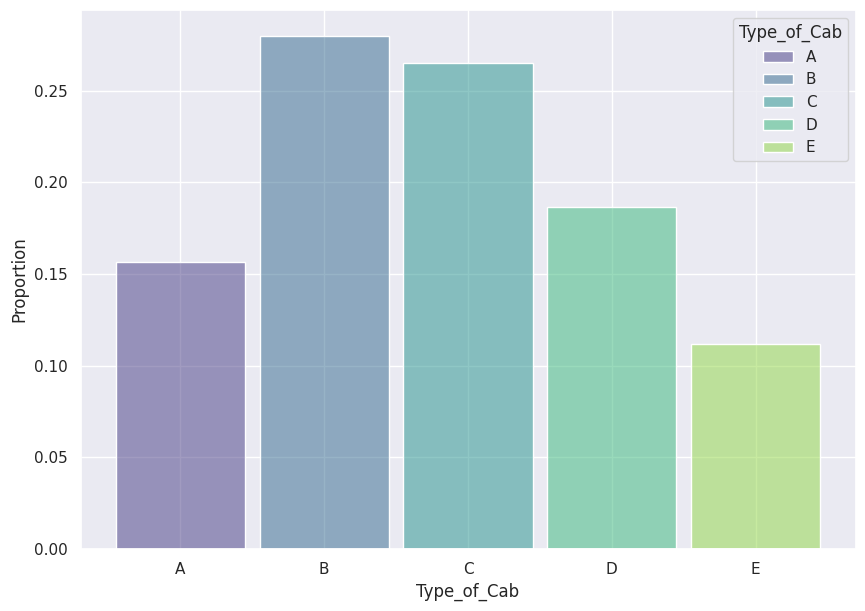

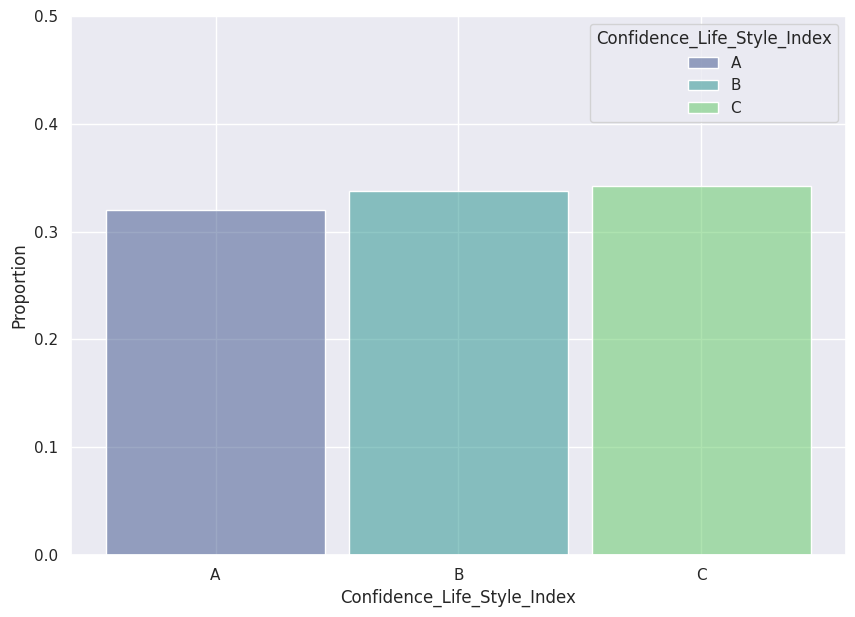

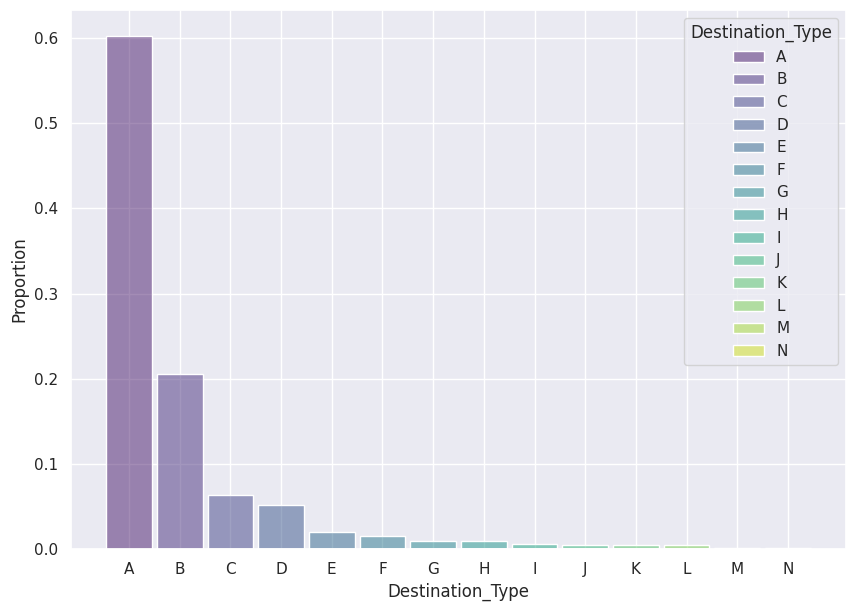

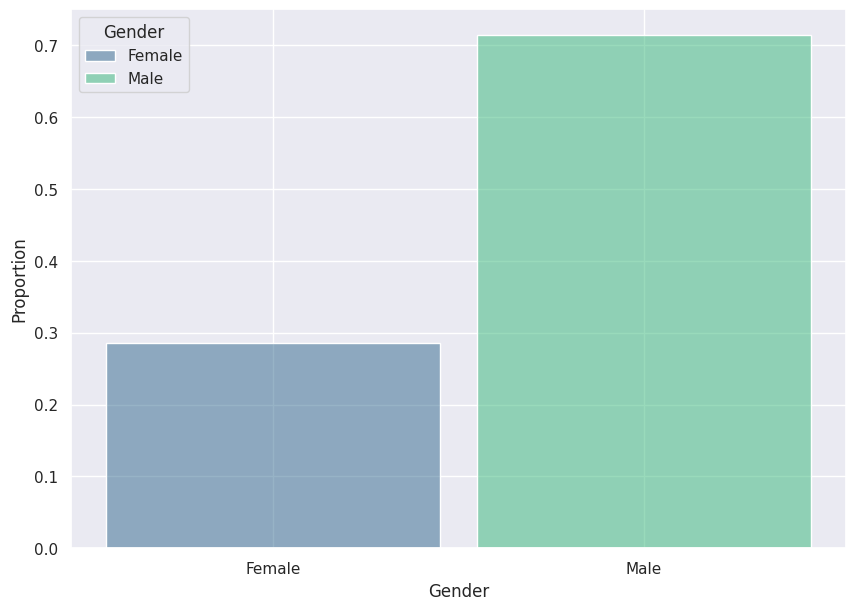

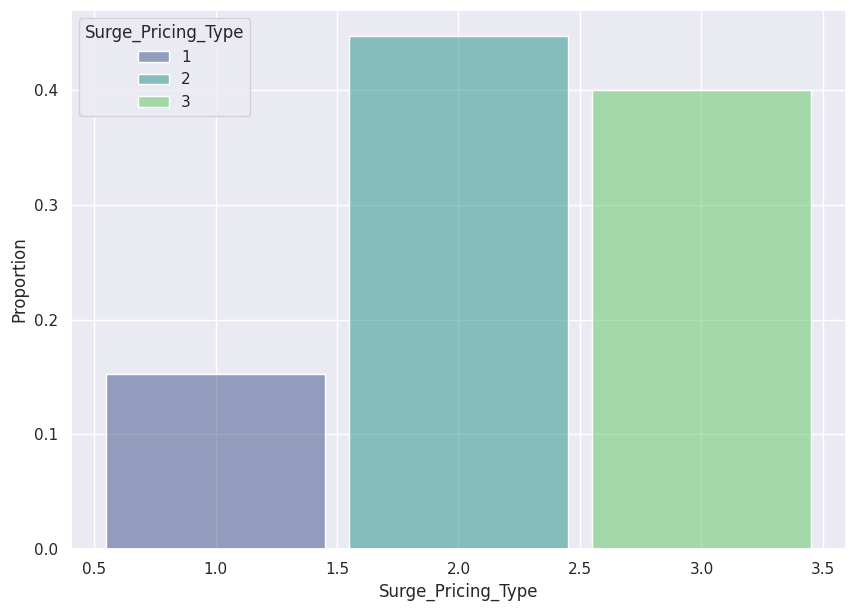

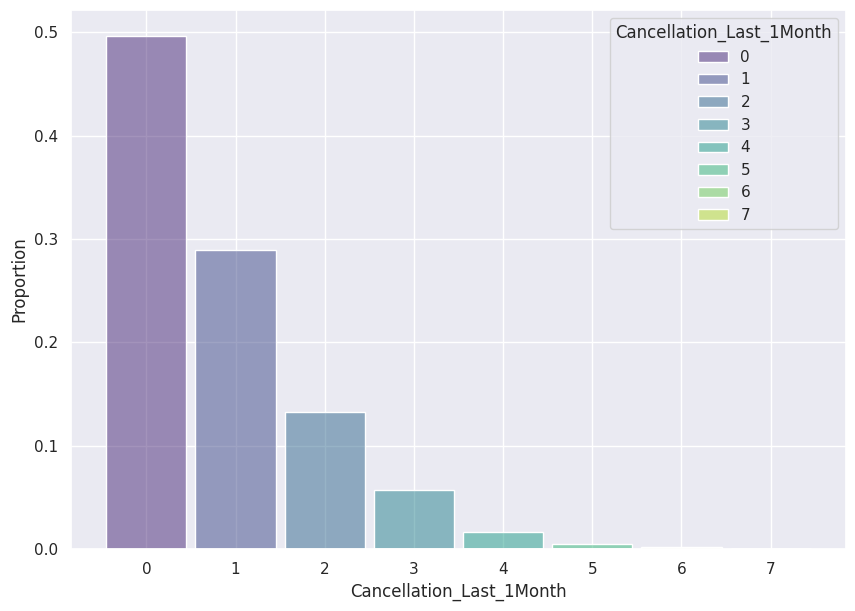

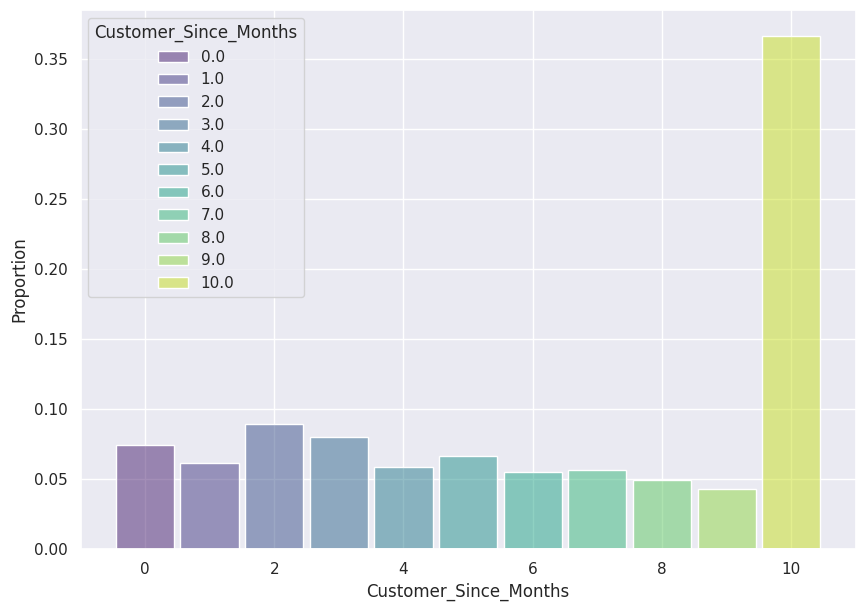

In [11]:
viz_cat(data_viz[cat_cols])

**Anlizando la data anterior podemos formular las siguientes hipotesis:**

*   **Las cabinas tipo B,C,D ocupan al menos el 70% de los usuarios**
*   **Los destinos tipo A y B ocupan al menos al 80% de los usuarios**
*   **Al menos el 70% de los usuarios son hombres**
*   **Cualquier categoria de confianza es igualmente probable entre los usuarios**
*   **Los precios 2 o 3 tienen al menos un 80% de probabilidad entre los usuarios**

**Es conveniente seguir explorando la data y sus relaciones para formular una concatenacion de hipotesis final que nos lleve a un resultado valioso**



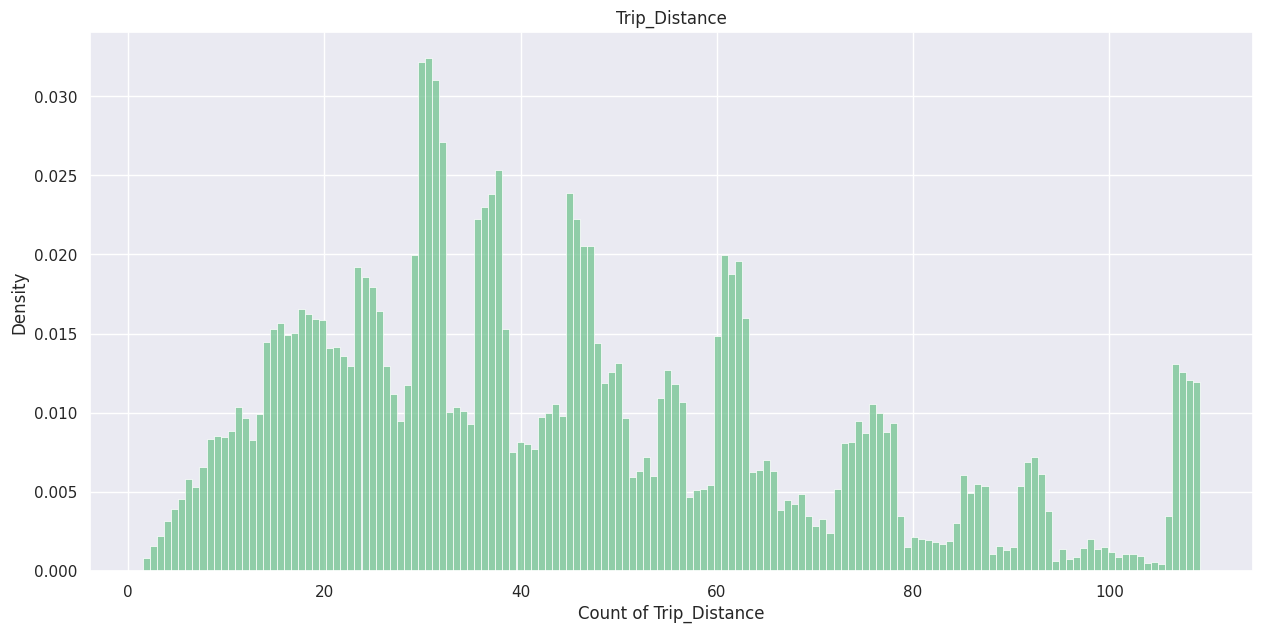

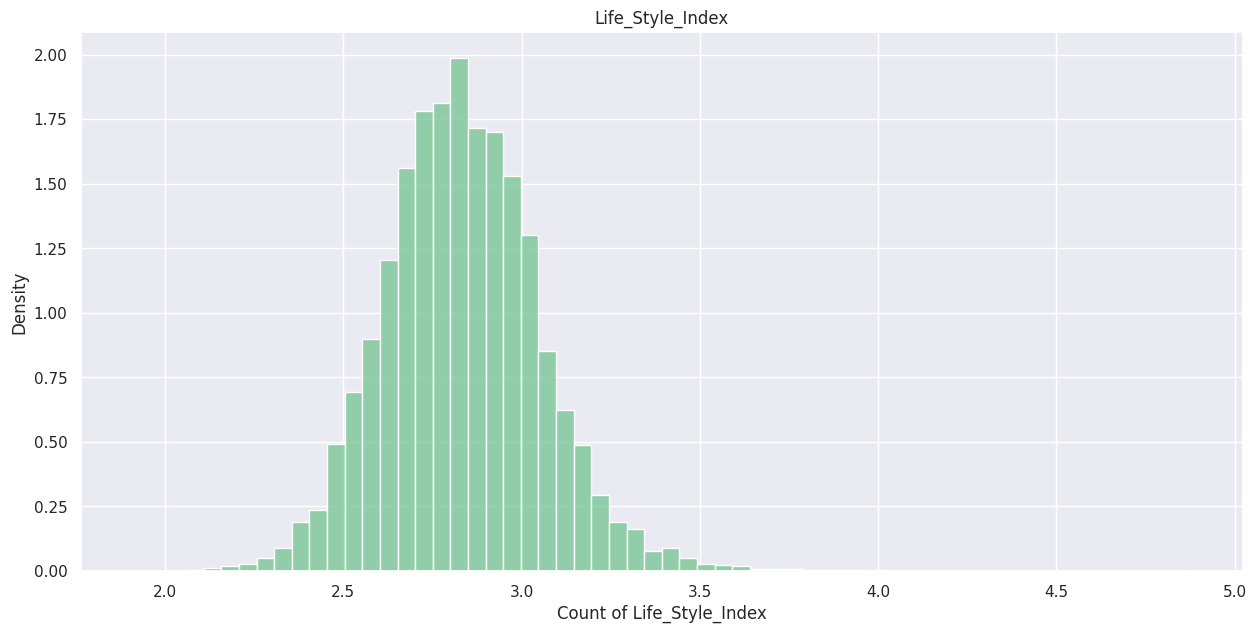

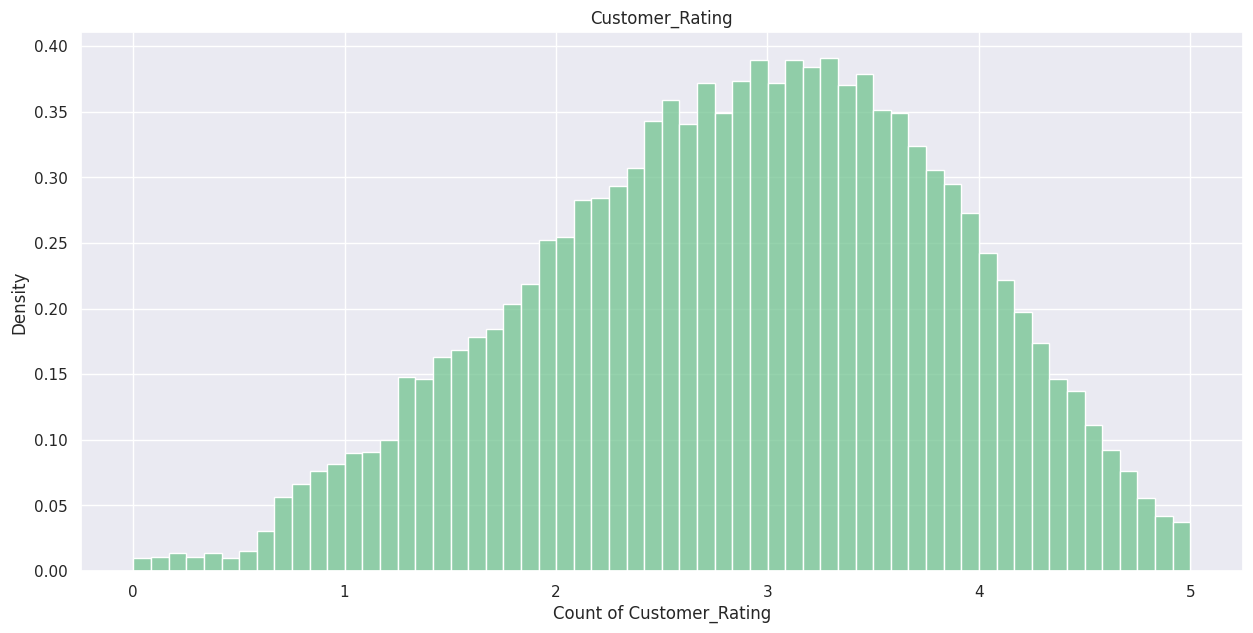

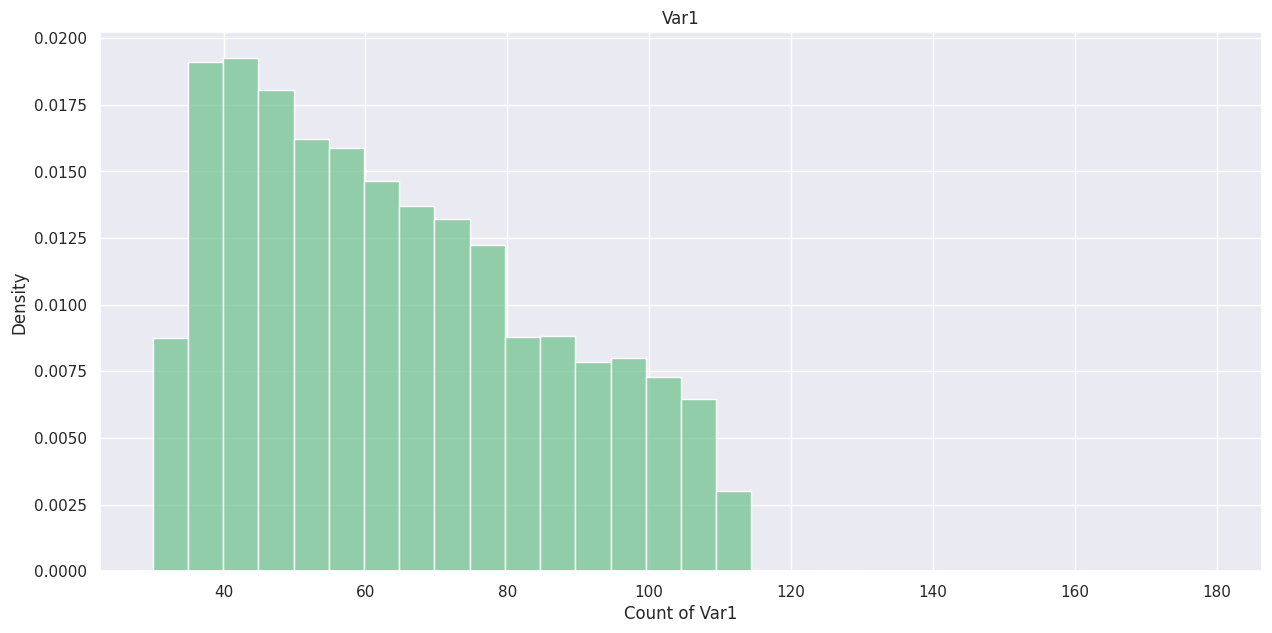

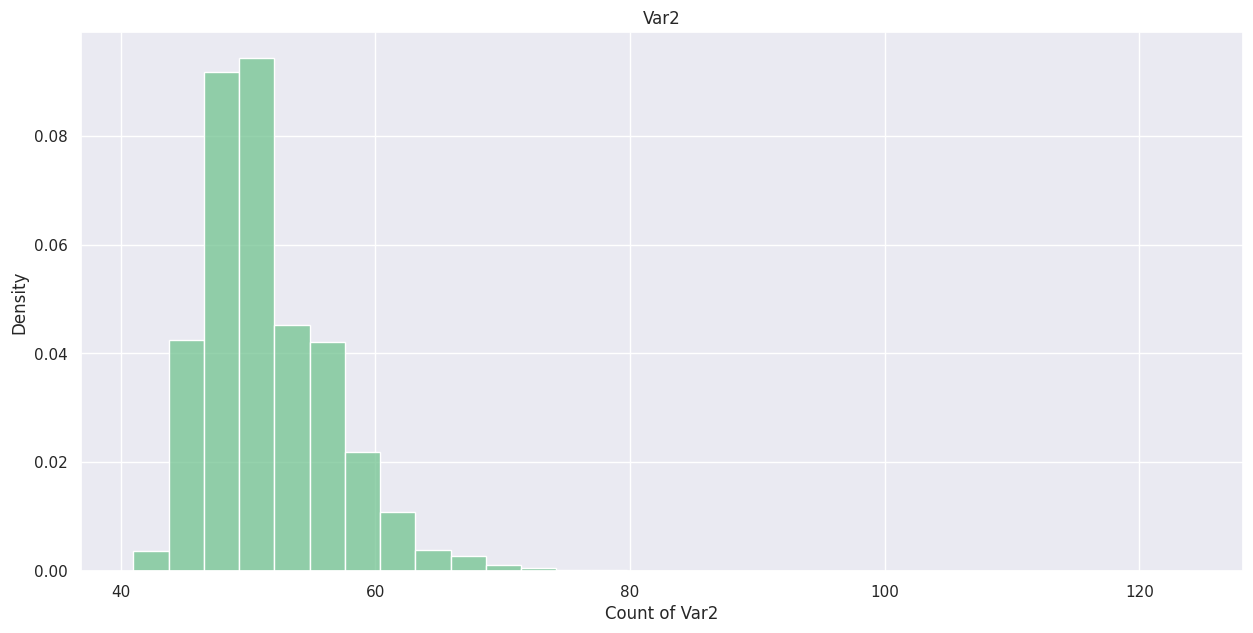

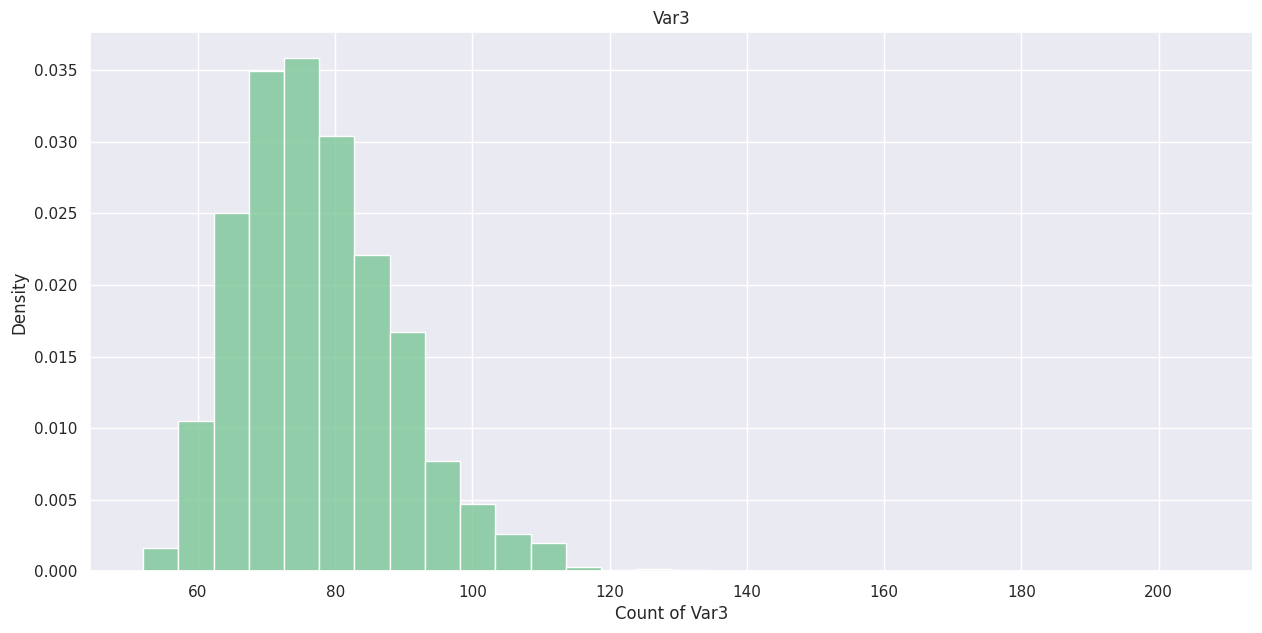

In [12]:
# exploramos las variables continuas
# visualicemos las distribuciones

bins=[150,60,60,30,30,30]
for index , colum_name in enumerate(data_viz[num_cols].columns):
    plt.figure(index,figsize=(15,7))
    plt.xlabel(f'Count of {colum_name}')
    plt.ylabel('Density')
    plt.title(colum_name)
    sns.histplot(x=colum_name,data=data_viz,stat='density', shrink=1,bins=bins[index],color='#72c490')
    plt.autoscale()

**Veamos que todas las variables numericas continuas siguen una distribucion unimodal excepto la distancia del viaje, esta presenta una tendencia multimodal. De modo que existen hasta 13 tipos de viajes frecuentes en terminos de distancia recorrida para los usuarios. Seria interesante representarla como una mezcla gaussiana y comprobar si el modelo se beneficia de esta representacion**

In [13]:
# Determinamos algunos cuantiles

q15,q85=np.quantile(data['Customer_Rating'], [0.15,0.85], axis=0)

print(f'Los quantiles de 15% y el 85% en cuanto a la calificacion de los usuarios son:\nq15 = {np.round(q15,2)}\nq85 = {np.round(q85,2)}')


Los quantiles de 15% y el 85% en cuanto a la calificacion de los usuarios son:
q15 = 1.81
q85 = 3.92


**Enriquecemos la data de visualizacion con la informacion de los quantiles y los usuarios que mas cancelan**

In [14]:
# construimos las listas

rating_top=['Low' if row<=2 else 'Average' if row<=4 else 'High' for row in data['Customer_Rating'] ]

canceling_top=['Hihg' if row>=3 else 'Normal'  for row in data['Cancellation_Last_1Month'] ]

# generamos las series

rating_top=pd.Series(data=rating_top,name='rating_top',index=data_viz[cat_cols].index).astype('category')

canceling_top=pd.Series(data=canceling_top,name='canceling_top',index=data_viz[cat_cols].index).astype('category')


# concatenmaos las series al dataframe original

data_viz=pd.concat(objs=[data_viz[num_cols],data_viz[cat_cols],rating_top,canceling_top],axis=1, ignore_index=False)

data_viz.dtypes

Trip_Distance                   float64
Life_Style_Index                float64
Customer_Rating                 float64
Var1                            float64
Var2                              int64
Var3                              int64
Type_of_Cab                    category
Confidence_Life_Style_Index    category
Destination_Type               category
Gender                         category
Surge_Pricing_Type             category
Cancellation_Last_1Month       category
Customer_Since_Months          category
rating_top                     category
canceling_top                  category
dtype: object

In [15]:

# determinamos el nombre de las variables numericas y categoricas

cat_cols=[

                  data_viz.columns[k]

                    for k in range(len(data_viz.columns))

                        if

                            str(data_viz[data_viz.columns[k]].dtype)
                                            in ['category']

                    ]

num_cols=[

                  data_viz.columns[k]

                    for k in range(len(data_viz.columns))

                        if

                            data_viz[data_viz.columns[k]].dtype
                                            in ['float64','int64']

                    ]

In [16]:
# generamos varias funciones que nos permitan hacer las visualizaciones requeridas

# Estas funciones asumen existen listas con los nombres de las variables
# categoricas y numericas

# Visualizacion categorica

def viz_cat(data,hue,multiple):
    sns.set_theme(style="darkgrid")
    data=data[cat_cols]
    colum_name=list(data.columns)
    colum_name.remove(hue)
    for colum in colum_name:
        plt.figure(figsize=(10,10))
        sns.histplot(
            x=colum,
            hue=hue,
            data=data,
            stat='proportion',
            shrink=0.9,
            palette='Spectral',
            legend=True,
            multiple=multiple)


# visualizaion de hist

def viz_num_hist(data,hue,multiple,stat):
    bins=[100,60,60,30,30,30]
    sns.set_theme(style="darkgrid")
    colum_name=list(data.columns)
    colum_name.remove(hue)
    for index , colum in enumerate(data[num_cols].columns):
        plt.figure(figsize=(10,10))
        sns.histplot(data=data,
                     x=colum,
                     hue=hue,stat=stat,
                     multiple=multiple,
                     bins=bins[index],
                     palette='Spectral')

# Visualizacion de box

def viz_num_box(data,hue):
    sns.set_theme(style="darkgrid")
    colum_name=list(data.columns)
    colum_name.remove(hue)
    for index , colum in enumerate(data[num_cols].columns):
        plt.figure(figsize=(10,10))
        sns.boxplot(data=data, x=hue,y=colum,palette='Spectral')

**Macro funcion de analisis visual**

In [17]:


def macro_viz(data,hue):
    # visualizacion categorica
    viz_cat(data=data,hue=hue,multiple='dodge')
    # visualizacion cateogrica segun proporciones
    viz_cat(data=data,hue=hue,multiple='fill')
    # visualizacion de historigrama
    viz_num_hist(data=data,hue=hue,multiple='fill',stat='density')
    # visualizacion de caja
    viz_num_box(data=data_viz,hue=hue)



In [18]:
for colum in cat_cols:
    print(colum)

Type_of_Cab
Confidence_Life_Style_Index
Destination_Type
Gender
Surge_Pricing_Type
Cancellation_Last_1Month
Customer_Since_Months
rating_top
canceling_top


In [19]:
for index, colum in enumerate(cat_cols):
    print(index,'.-',colum)

0 .- Type_of_Cab
1 .- Confidence_Life_Style_Index
2 .- Destination_Type
3 .- Gender
4 .- Surge_Pricing_Type
5 .- Cancellation_Last_1Month
6 .- Customer_Since_Months
7 .- rating_top
8 .- canceling_top


# **Estudiamos la data segun una distincion categorica de nuestra preferencia. De los graficos podemos extraer las primeras hipotesis**





------------------------------ MENU ------------------------------
0 .- Type_of_Cab
1 .- Confidence_Life_Style_Index
2 .- Destination_Type
3 .- Gender
4 .- Surge_Pricing_Type
5 .- Cancellation_Last_1Month
6 .- Customer_Since_Months
7 .- rating_top
8 .- canceling_top

Enter your choice and press Enter :

3


<ipython-input-16-88f500b4f4ca>:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


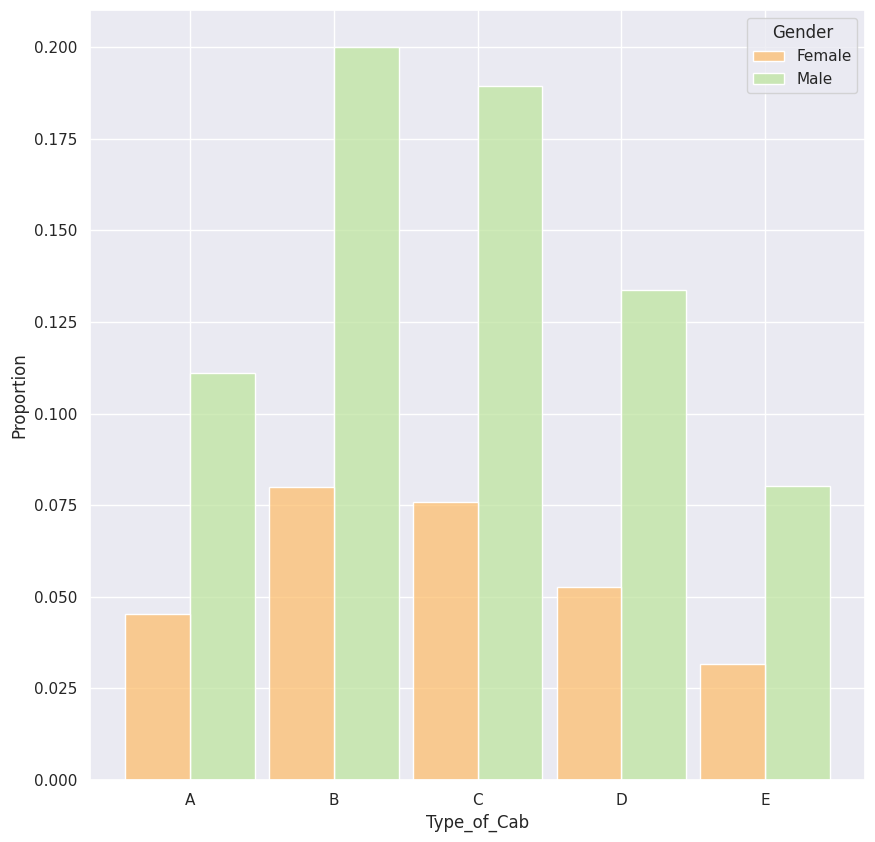

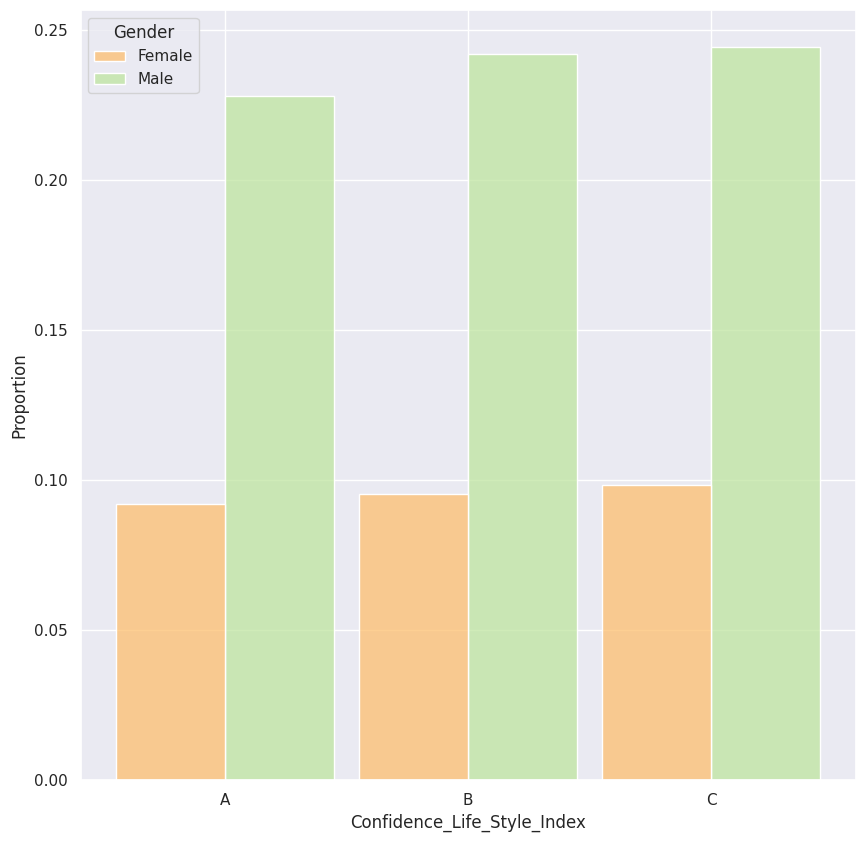

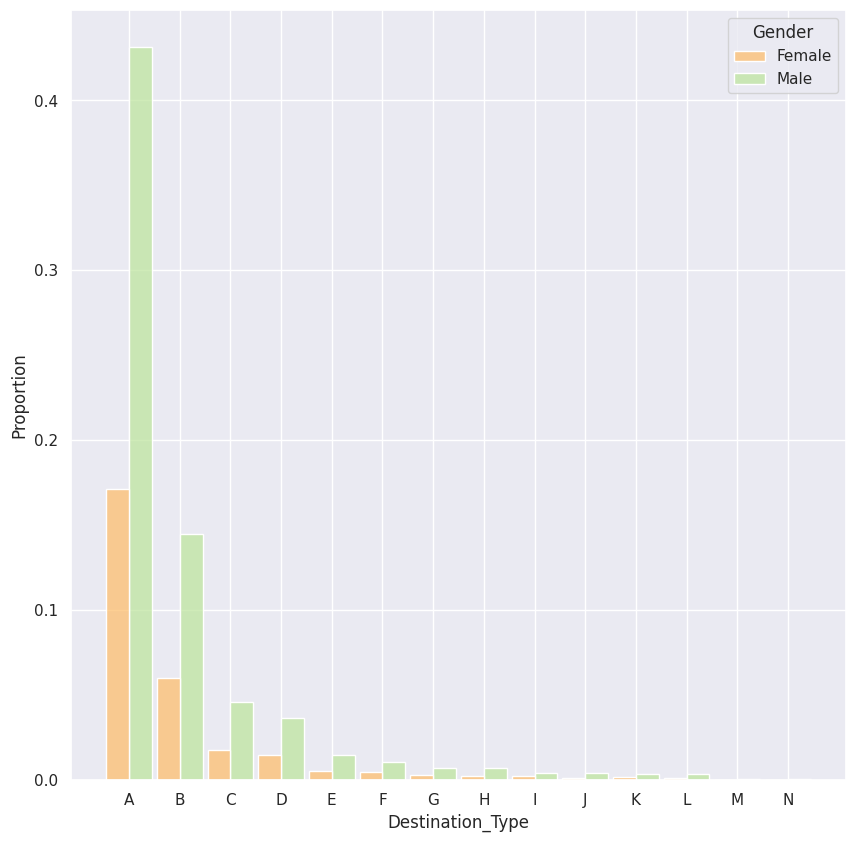

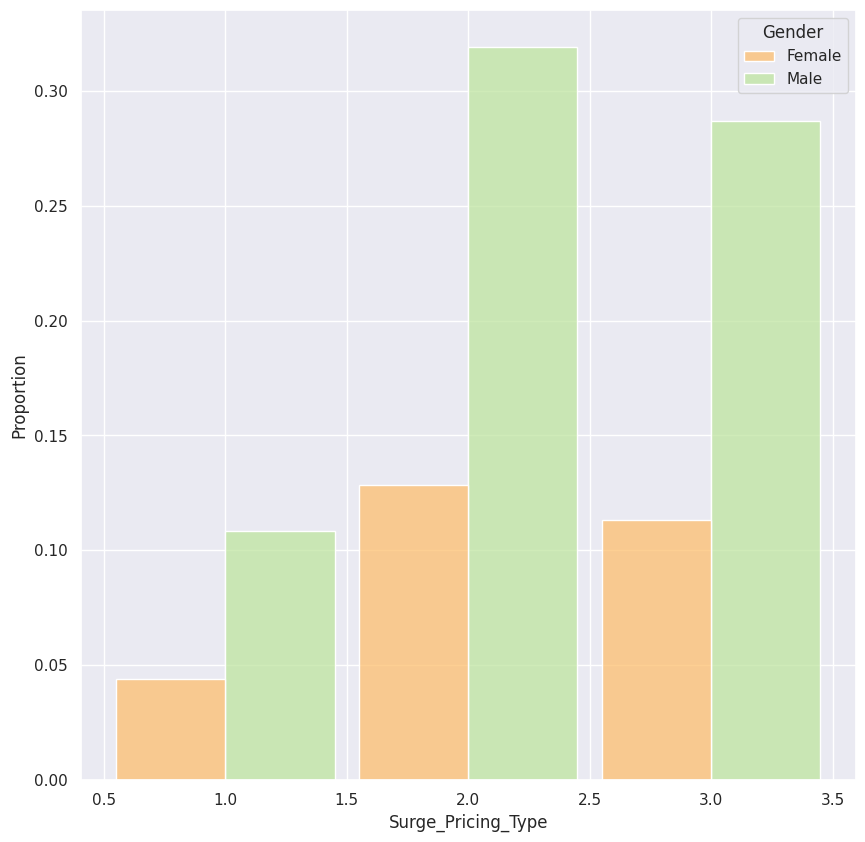

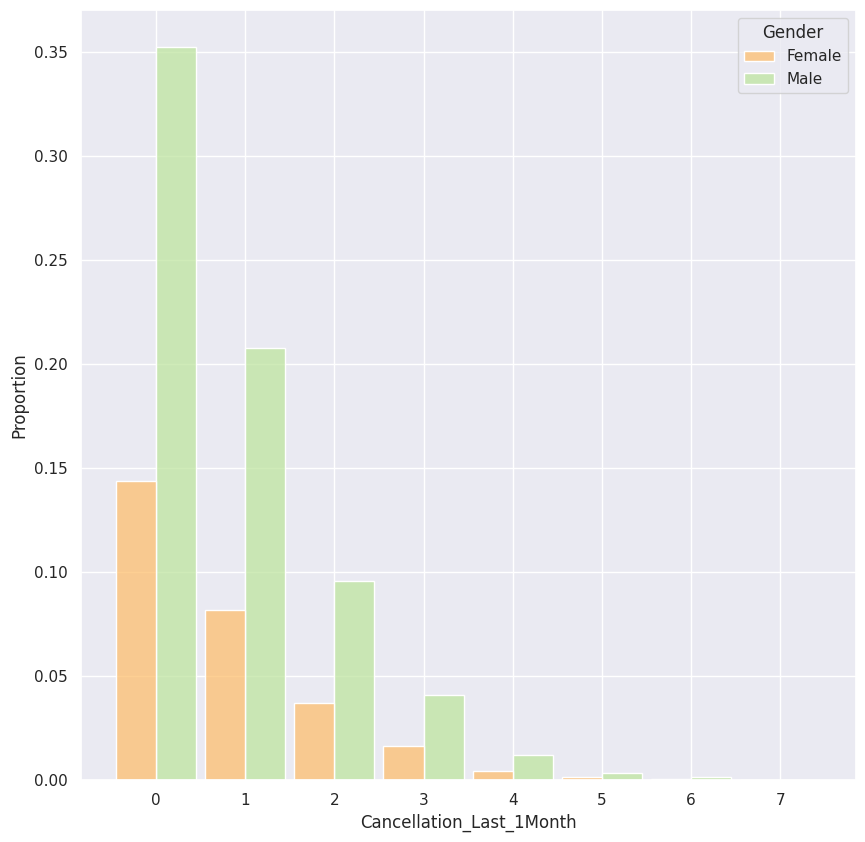

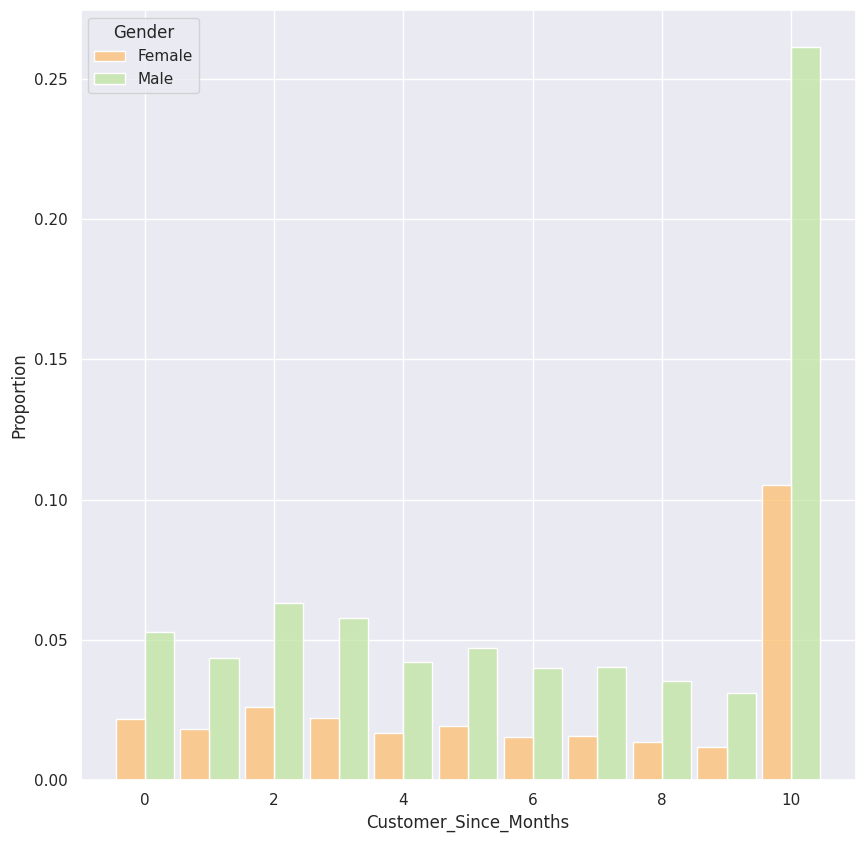

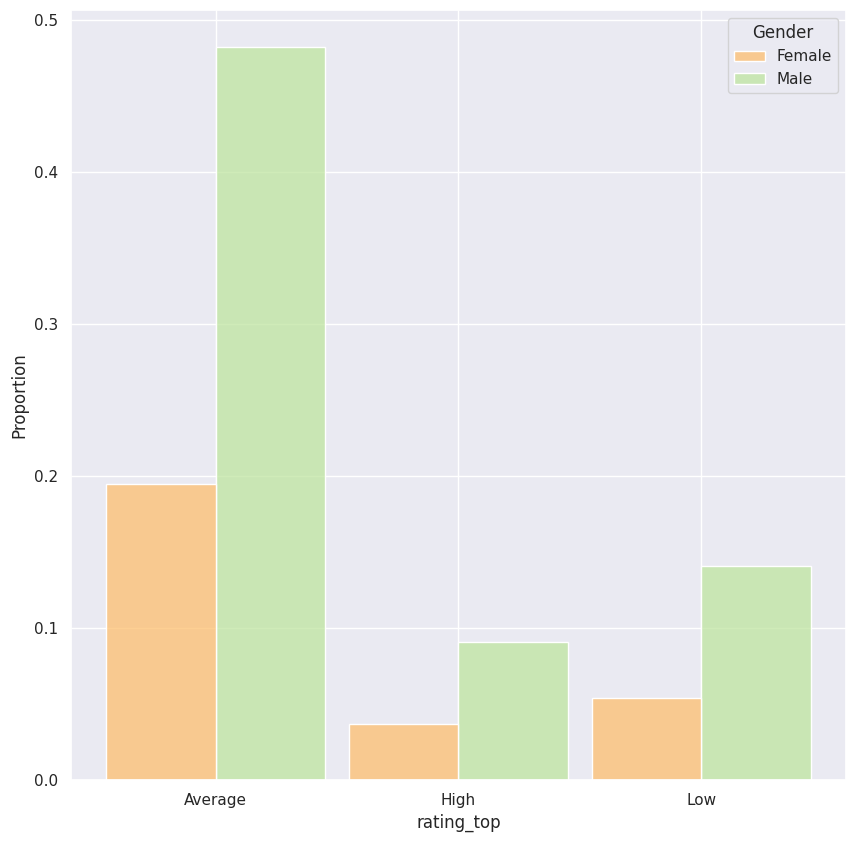

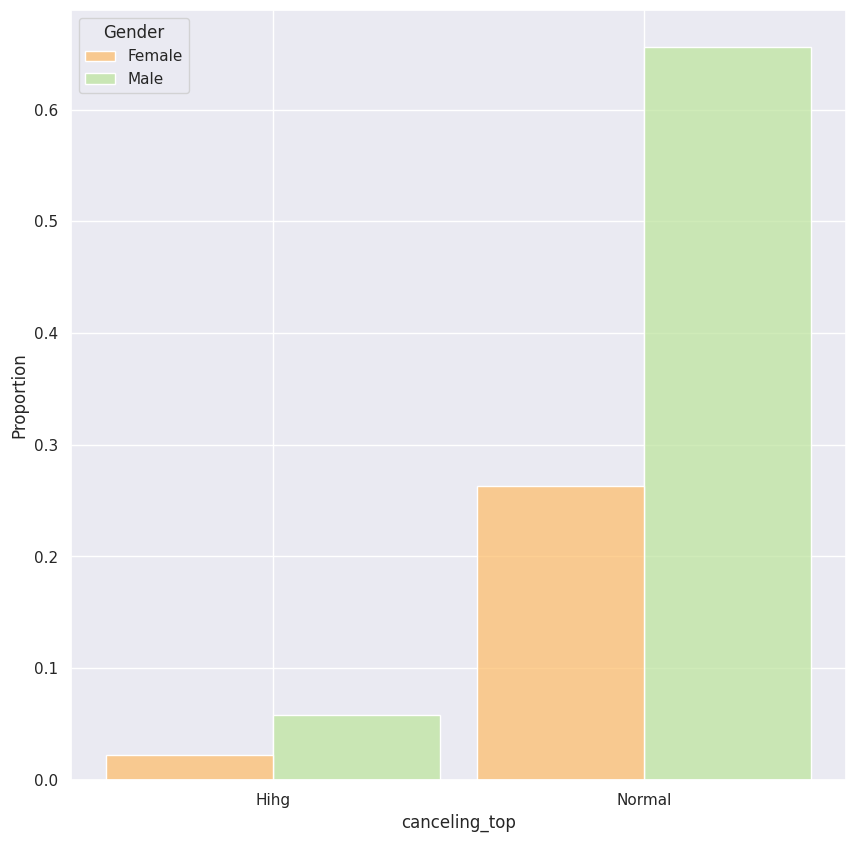

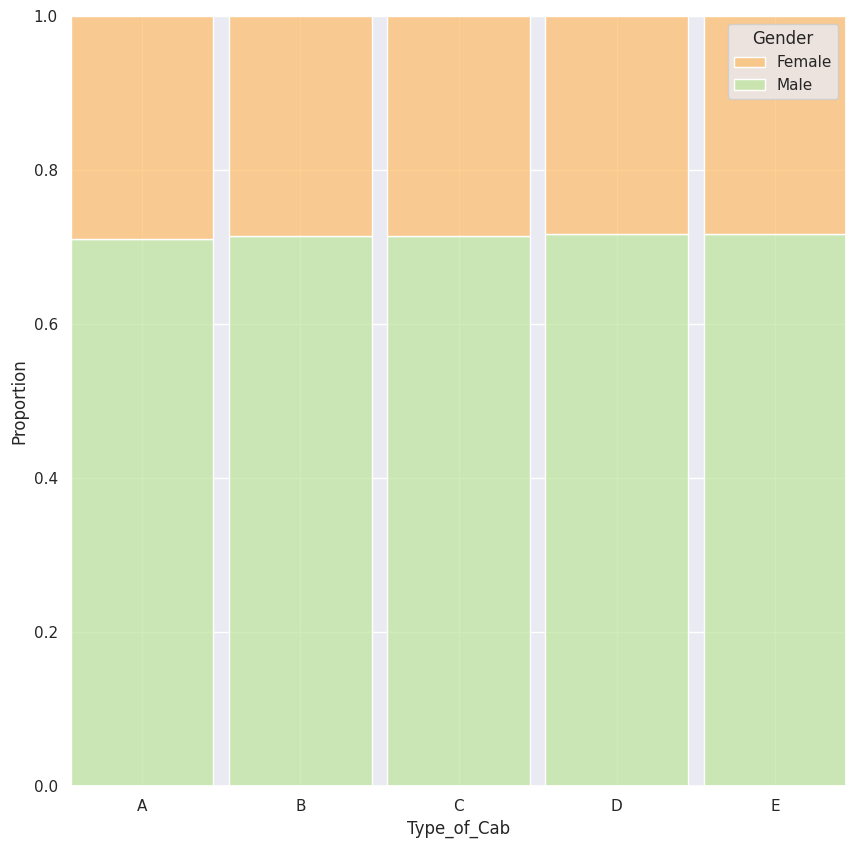

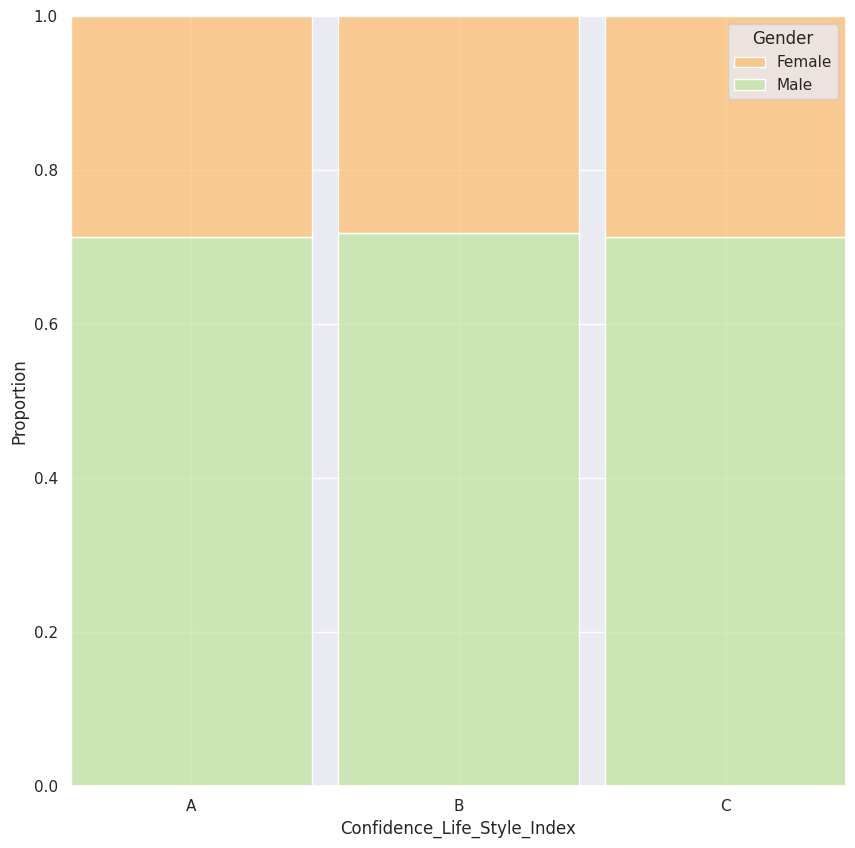

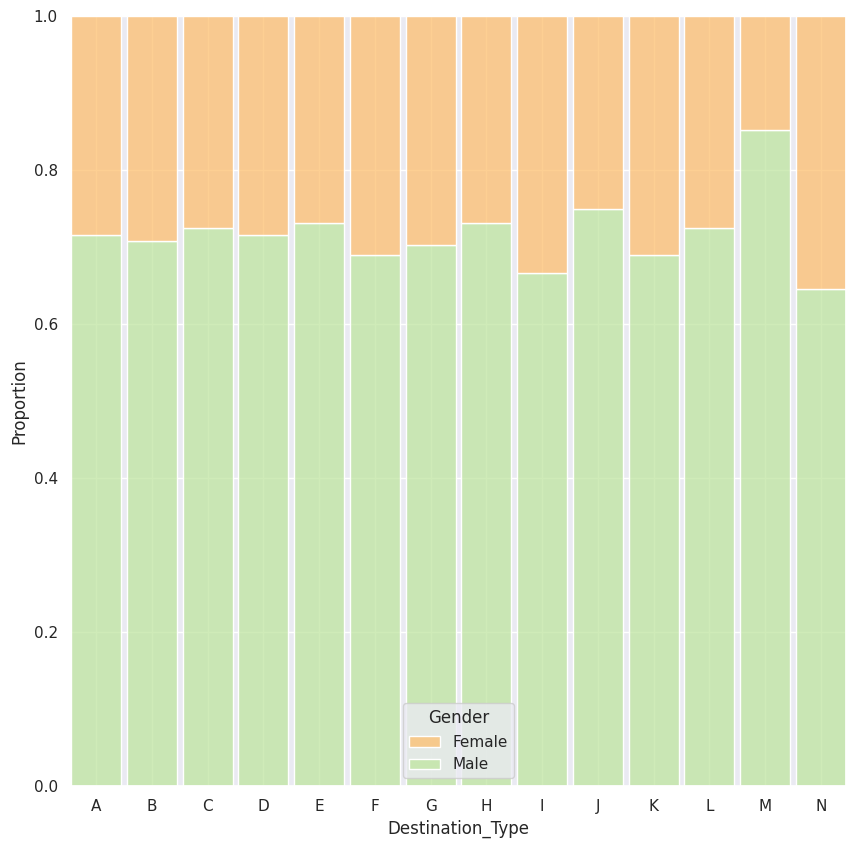

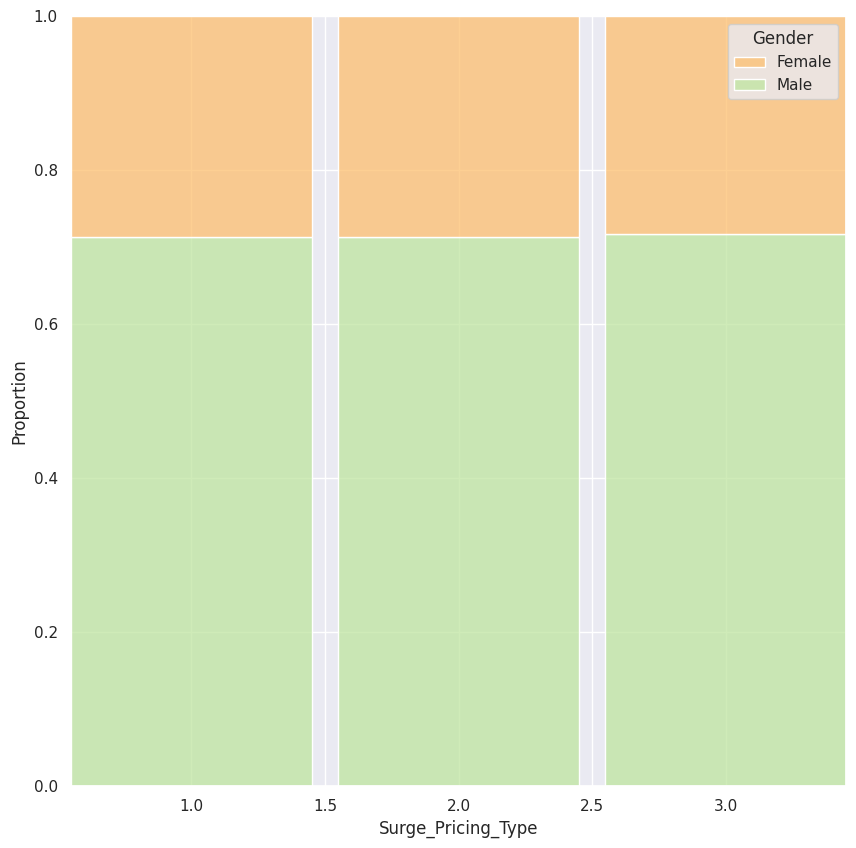

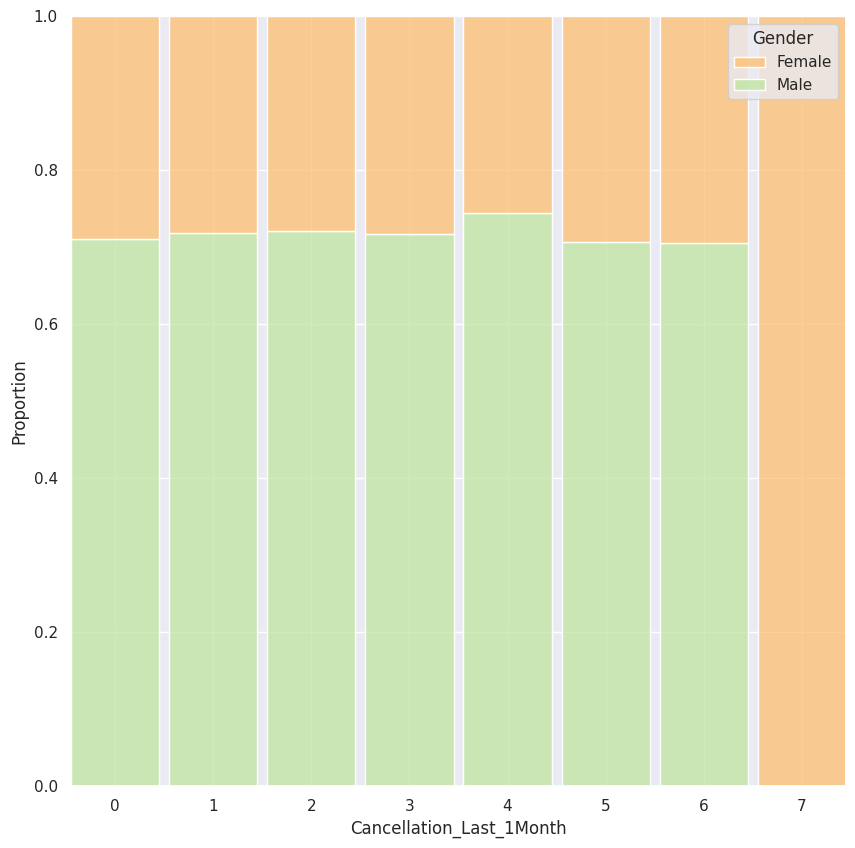

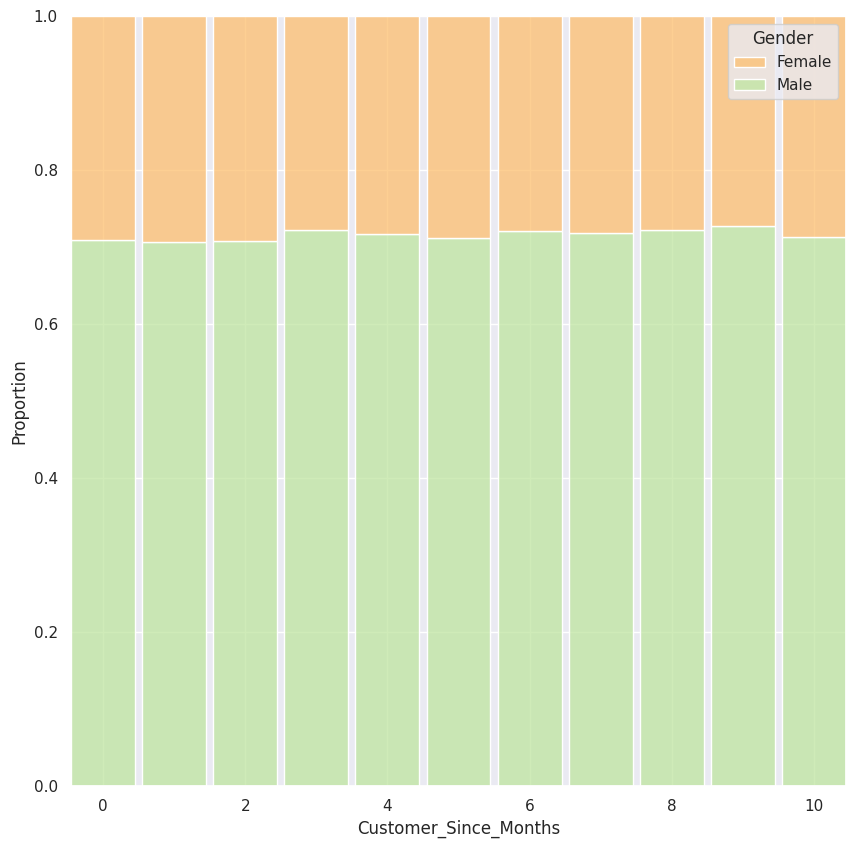

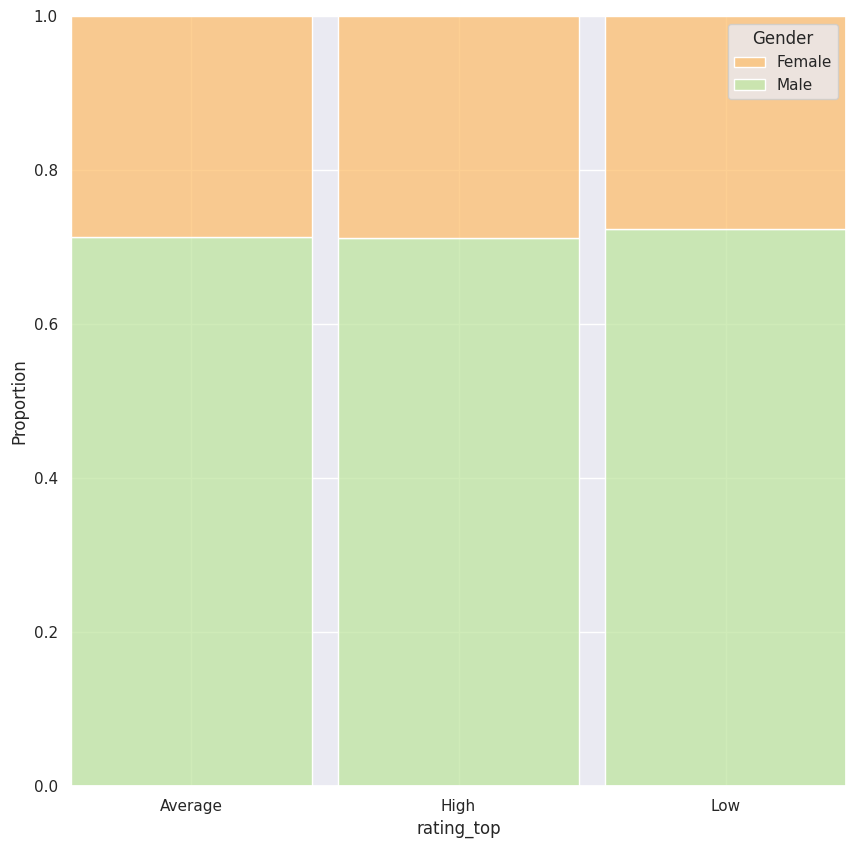

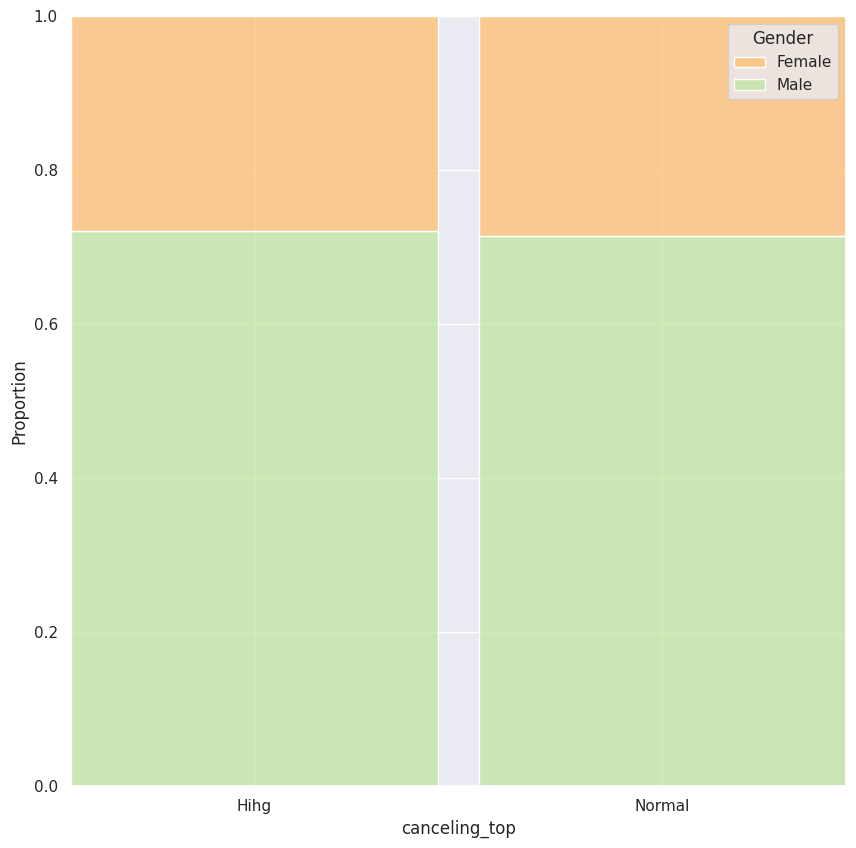

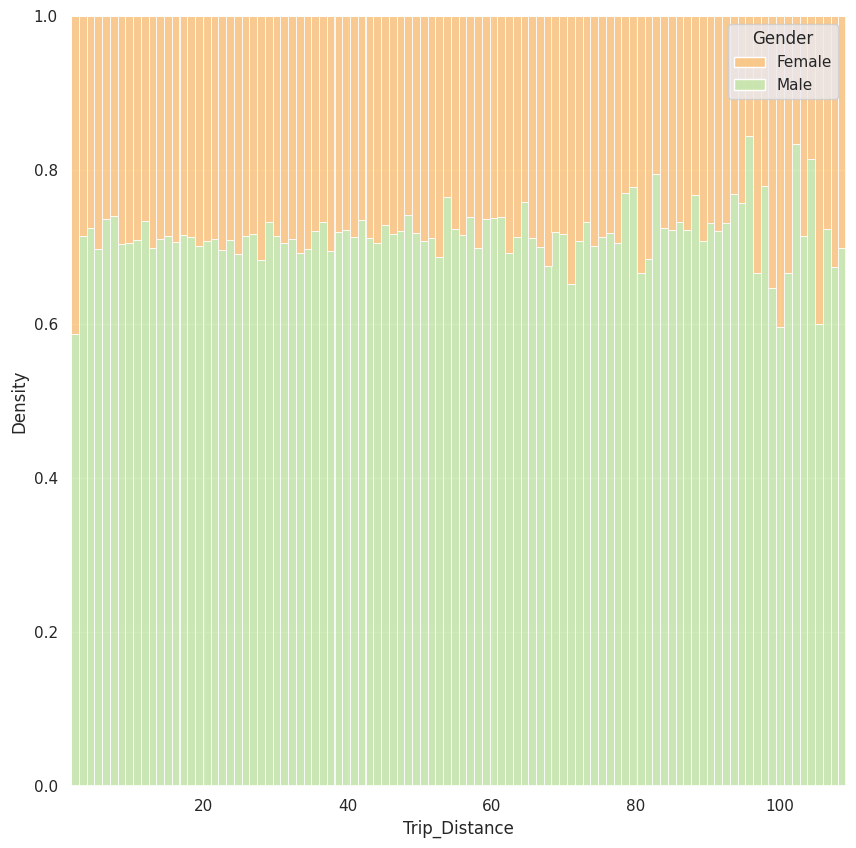

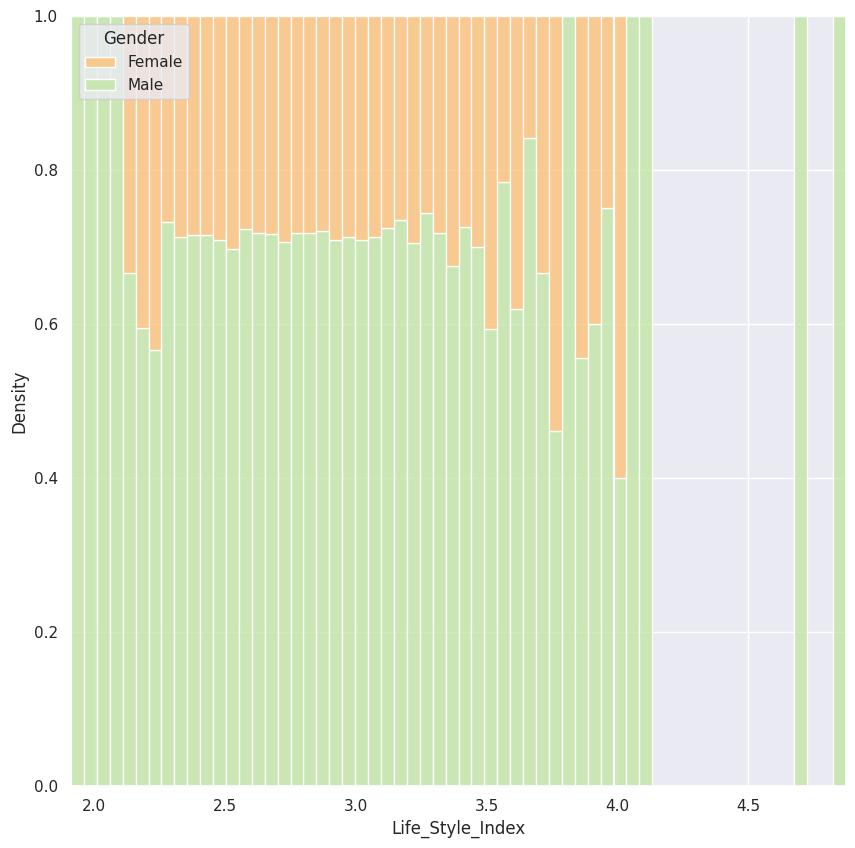

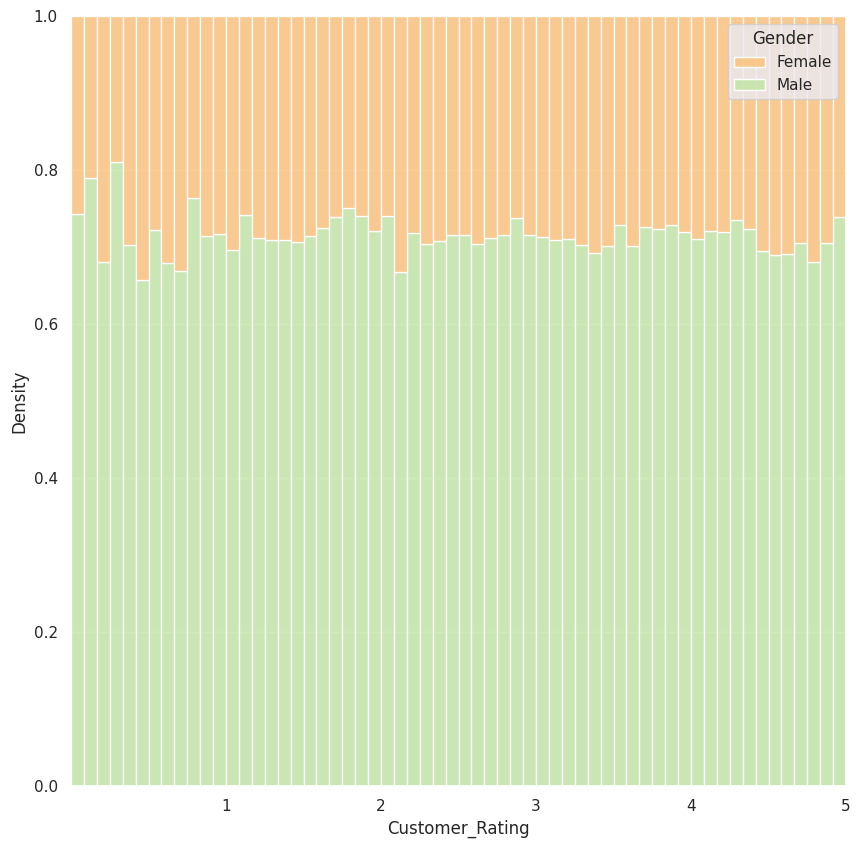

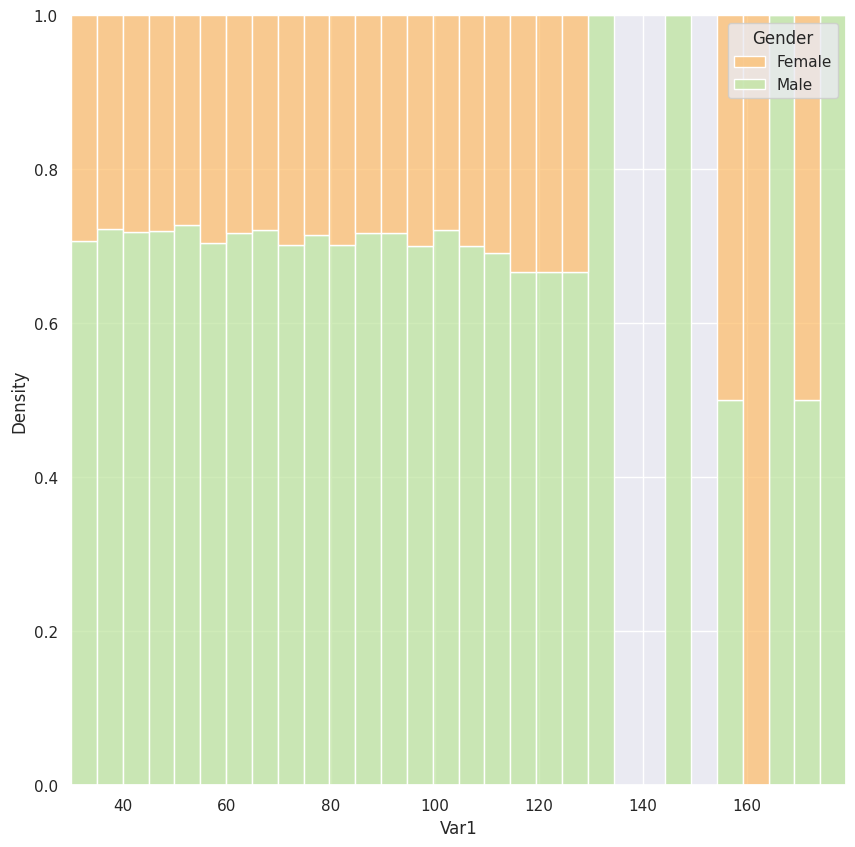

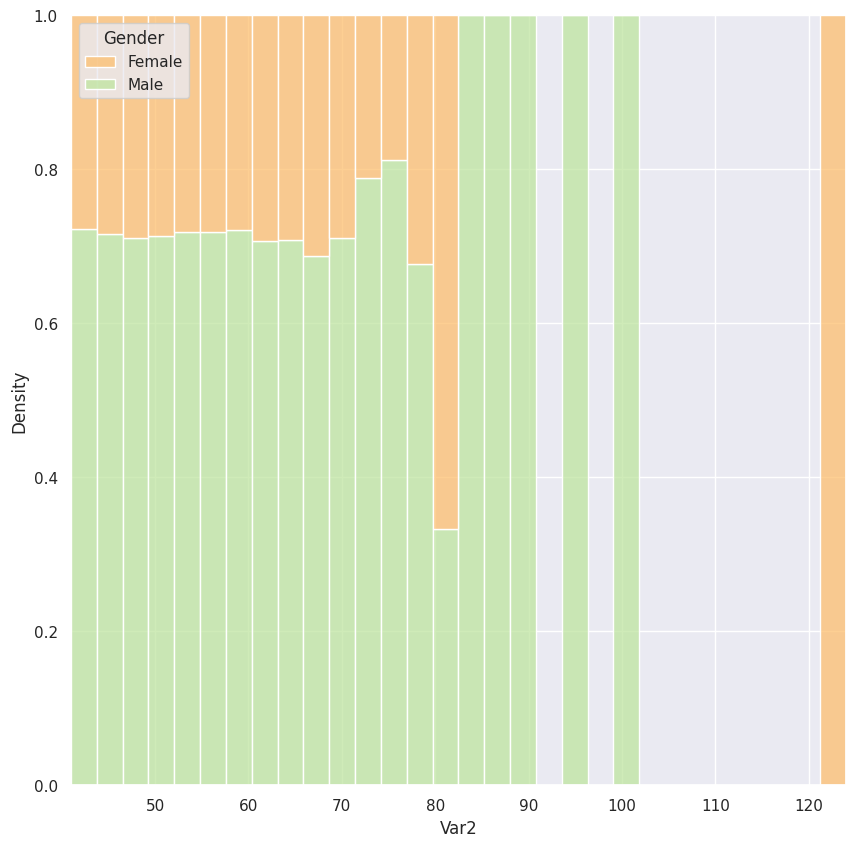

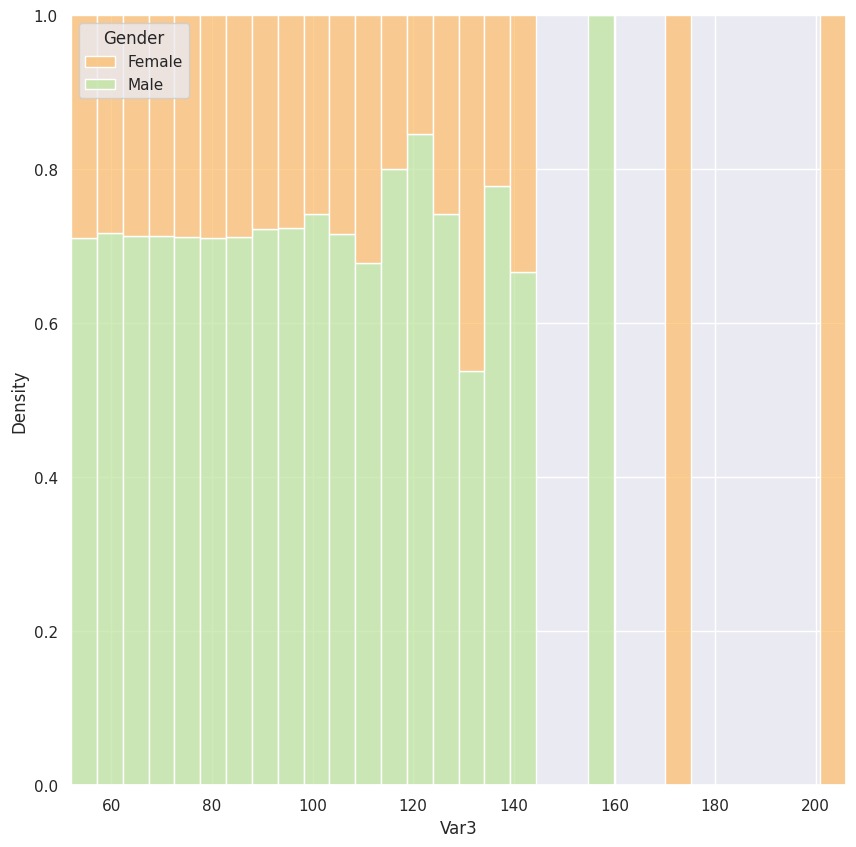

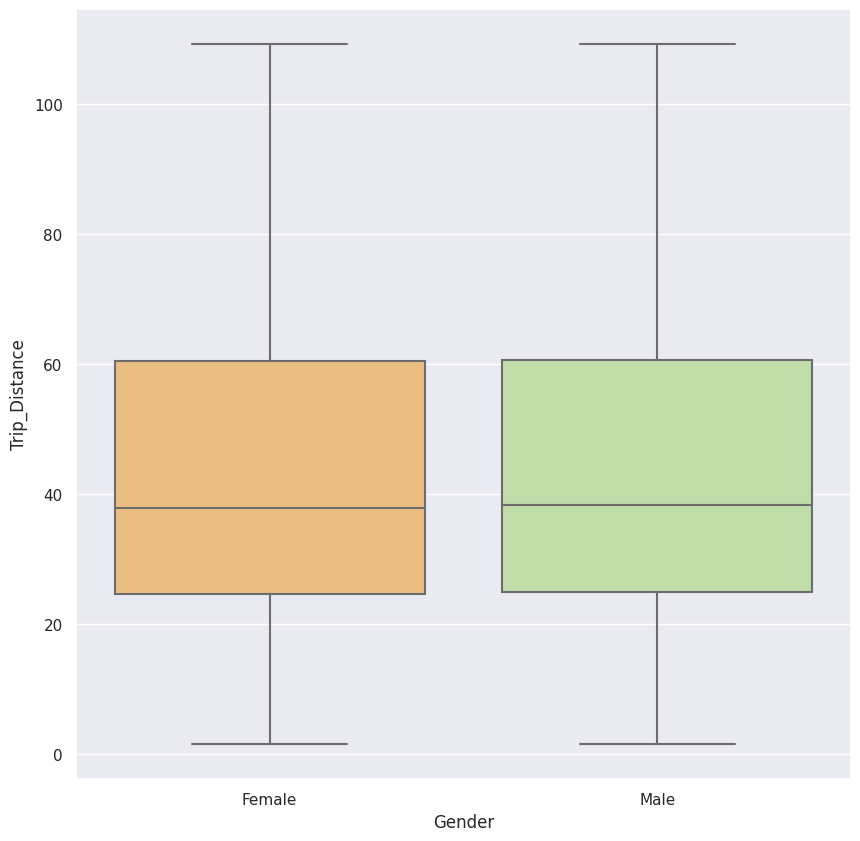

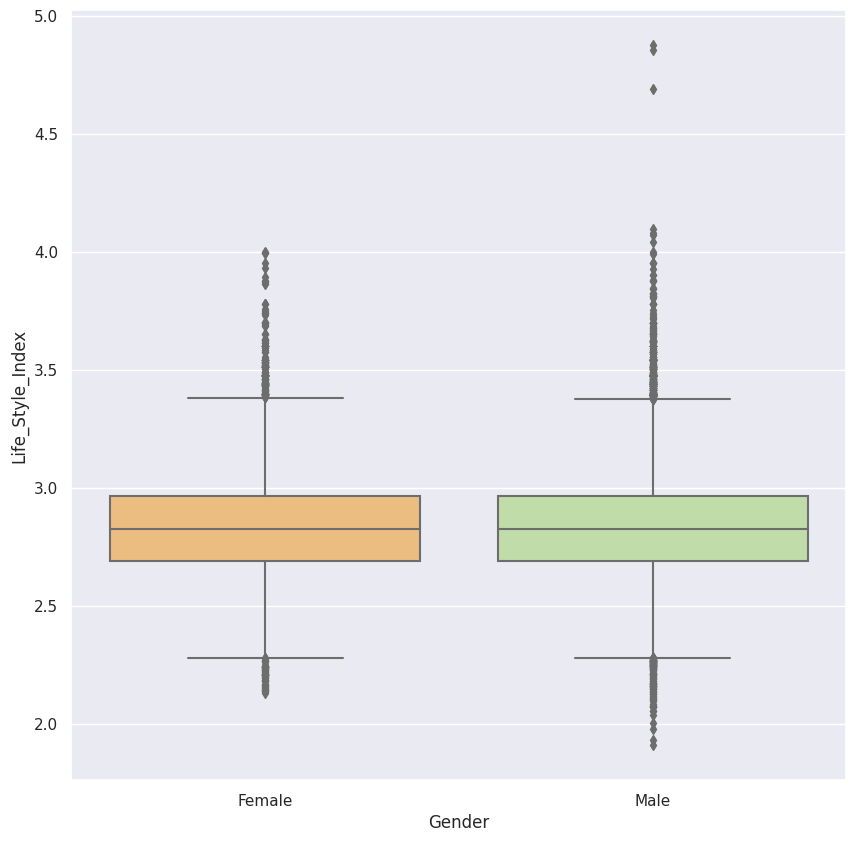

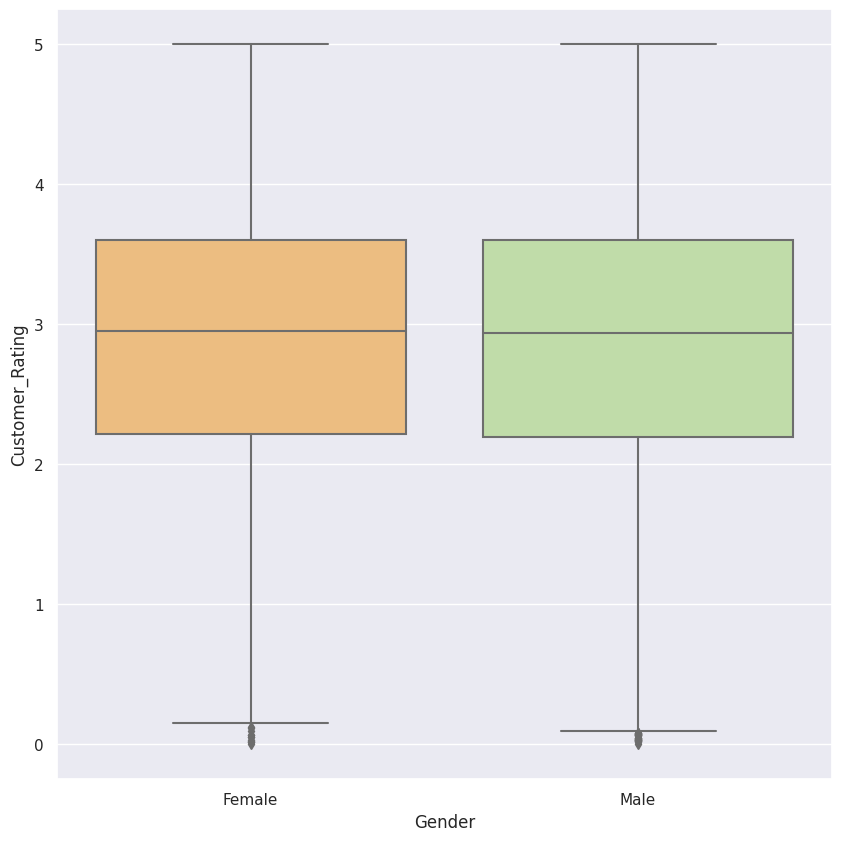

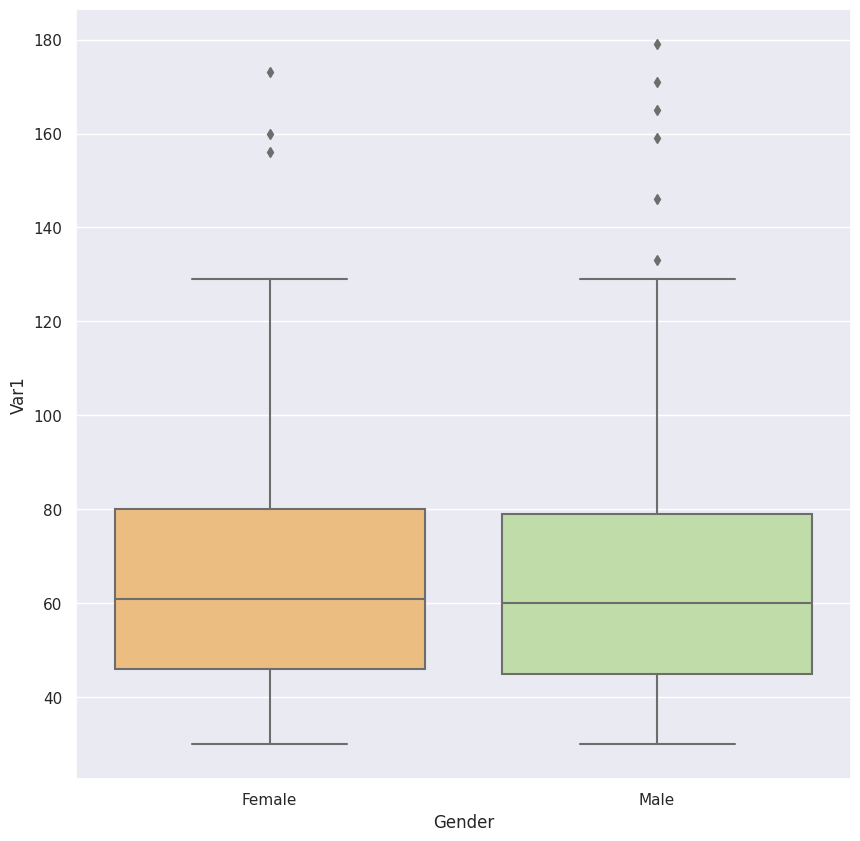

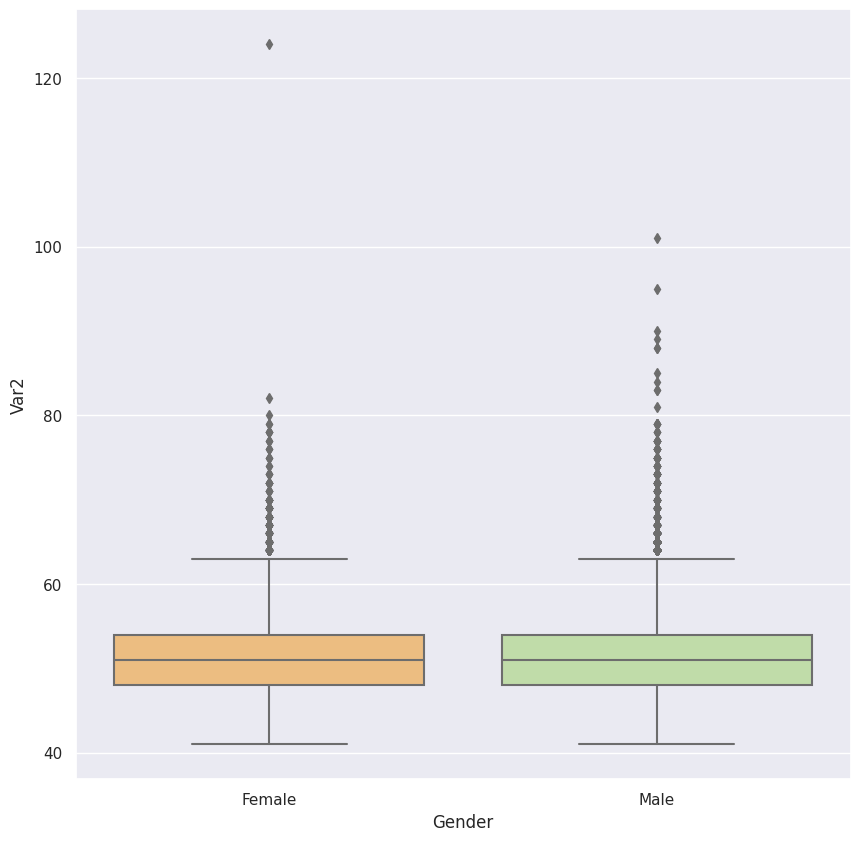

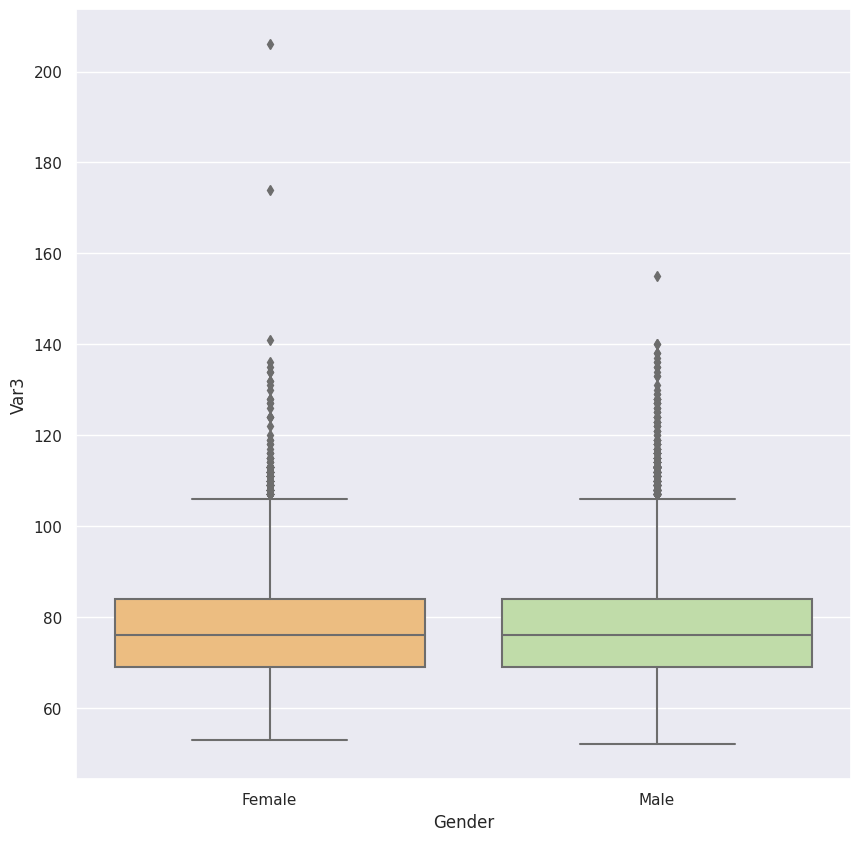

In [20]:
# contruimos un menu
# y ejectuamos analisis

# primero definimos las funciones

def print_menu():  ## Your menu design here
    print('\n')
    print(30 * "-", "MENU", 30 * "-")
    for index, colum in enumerate(cat_cols):
        print(index,'.-',colum)


# ejecutamos el menu

print_menu()
choice = int(input("\nEnter your choice and press Enter :\n\n"))
macro_viz(data=data_viz,hue=cat_cols[choice])


# **Pruebas de Hipotesis**

**Buscaremos responder aquellas preguntas cuya respuesta pueda aportar informacion valiosa para deciciones de mercado favorables a la empresa**

**En primer lugar, es conveniente probar :**


*  Las cabinas tipo B,C,D ocupan al menos el 70% de los usuarios
*  Los destinos tipo A y B ocupan al menos al 80% de los usuarios
*  El 70% de los usuarios son hombres
*  Los precios 2 o 3 tienen al menos un 80% de probabilidad entre los usuarios
*  Un proporcion del 0.8 cancela menos de 3 veces al mes


In [21]:
# Las cabinas tipo B,C,D ocupan al menos el 70% de los usuarios

# ocuparemos esta hipotesis con un invertvalo de confianza

# determinamos la propocion que ocupan las cabinas tipo B,C y D sumadas

p=sum(data_viz['Type_of_Cab'].value_counts().iloc[:3])/len(data_viz['Type_of_Cab'])

print(f'p={round(p,4)}')

n=len(data_viz)

alpha=(0.01)

print(f'alpha={alpha}')

sigma=np.sqrt( (p-p**2)/n )

#determinamos z_alpha

z_alpha=norm.isf(alpha/2, loc=0, scale=1)

lu=p+sigma*z_alpha
ld=p-sigma*z_alpha

print(f'Intervalo de confianza para p => [{round(ld,4)} , {round(lu,4)}]')

p=0.7317
alpha=0.01
Intervalo de confianza para p => [0.7261 , 0.7373]


**Con una confianza del 99% Podemos decir entre las cabinas tipo B,C y D se ocupan entre el 72% y el 75% de los usuarios**

In [22]:
# Veamos el rango que ocupa la proporcion de usuarios que usan las cabinas tipo A y B

# determinamos la propocion que ocupan las cabinas A y B sumadas

p=sum(data_viz['Destination_Type'].value_counts().iloc[:2])/len(data_viz['Destination_Type'])

print(f'p={round(p,4)}')

n=len(data_viz)

alpha=0.01

print(f'alpha={alpha}')

sigma=np.sqrt( (p-p**2)/n )

#determinamos z_alpha

z_alpha=norm.isf(alpha/2, loc=0, scale=1)

lu=p+sigma*z_alpha
ld=p-sigma*z_alpha

print(f'Intervalo de confianza para p => [{round(ld,4)} , {round(lu,4)}]')

p=0.8077
alpha=0.01
Intervalo de confianza para p => [0.8028 , 0.8127]


**Con una confianza del 99% Podemos decir que entre los destinos de tipo A y B ocupan una proporcion de entre el [ 0.79-0.82 ] de los clientes**

In [23]:
# El 70% de los usuarios son hombres

# Trabajaremos con un intervalo de confianza

# determinamos la propocion hombres respecto al total

p=sum(data_viz['Gender'].value_counts().iloc[:1])/len(data_viz['Gender'])

print(f'p={round(p,4)}')

n=len(data_viz)

alpha=(0.01)

print(f'alpha={alpha}')

sigma=np.sqrt( (p-p**2)/n )

#determinamos z_alpha

z_alpha=norm.isf(alpha/2, loc=0, scale=1)

lu=p+sigma*z_alpha
ld=p-sigma*z_alpha

print(f'Intervalo de confianza para p => [{round(ld,4)} , {round(lu,4)}]')

p=0.7145
alpha=0.01
Intervalo de confianza para p => [0.7088 , 0.7202]


**Con un 99% de confianza es posible asegurar que la proporcion de hombres que usan el servicio esta entre el 69% y el 73% del total**

In [24]:
#  Los precios 2 o 3 tienen un 80% de probabilidad de aparicion

# Trabajaremos con un intervalo de confianza

# determinamos la propocion

p=sum(data_viz['Surge_Pricing_Type'].value_counts().iloc[:2])/len(data_viz['Surge_Pricing_Type'])

print(f'p={round(p,4)}')

n=len(data_viz)

alpha=(0.01)

print(f'alpha={alpha}')

sigma=np.sqrt( (p-p**2)/n )

#determinamos z_alpha

z_alpha=norm.isf(alpha/2, loc=0, scale=1)

lu=p+sigma*z_alpha
ld=p-sigma*z_alpha

print(f'Intervalo de confianza para p => [{round(ld,4)} , {round(lu,4)}]')

p=0.8478
alpha=0.01
Intervalo de confianza para p => [0.8433 , 0.8524]


**Con un 99% de seguridad podemos decir que entre un 83%-86% de los usuarios son asignados con un precio de tipo 2 o 3**

In [25]:
#  Revisamos a la gente que mas cancela

# Trabajaremos con un intervalo de confianza

# determinamos la propocion

p=sum(data_viz['Cancellation_Last_1Month'].value_counts().iloc[:3])/len(data_viz)

print(f'p={round(p,4)}')

n=len(data_viz)

alpha=(0.01)

print(f'alpha={alpha}')

sigma=np.sqrt( (p-p**2)/n )

#determinamos z_alpha

z_alpha=norm.isf(alpha/2, loc=0, scale=1)

lu=p+sigma*z_alpha
ld=p-sigma*z_alpha

print(f'Intervalo de confianza para p => [{round(ld,4)} , {round(lu,4)}]')
print(f'Entre un ')
print(f'Entre un {round((1-lu)*100,2)}% y un {round((1-ld)*100,2)}% de los usuarios cancela 3 o mas veces al mes ')

p=0.9192
alpha=0.01
Intervalo de confianza para p => [0.9157 , 0.9226]
Entre un 
Entre un 7.74% y un 8.43% de los usuarios cancela 3 o mas veces al mes 


**Entre un 6.85% y un 8.67% de los usuarios cancela 3 o mas veces al mes**

In [26]:
# trabajando los rankings

# Trabajaremos con un intervalo de confianza

u=np.mean(data_viz['Customer_Rating'])

print(f'u={round(u,4)}')

alpha=0.01

print(f'alpha={alpha}')

n=len(data_viz)

sigma=np.std(data_viz['Customer_Rating'])/np.sqrt(n)

#determinamos z_alpha

z_alpha=norm.isf(alpha/2, loc=0, scale=1)

lu=u+sigma*z_alpha
ld=u-sigma*z_alpha

print(f'Intervalo de confianza para u => [{round(ld,4)} , {round(lu,4)}]')


u=2.8797
alpha=0.01
Intervalo de confianza para u => [2.8675 , 2.8919]


**Preguntas con valor de mercado**

*  La proporcion entre hombres y mujeres se mantiene igual para todos los rangos de distancias de viaje

*  La proporcion entre hombres y mujeres se mantiene igual para todos los rangos de calificaiones

*  Los usuarios que mas cancelan y los que cancelan regular mantienen la proporcion entre hombres y mujeres




**Hacemos la comprobacion de algunas de estas Hipotesis**

---



In [27]:
# La proporcion entre hombres y mujeres se mantiene igual para todos los
# rangos de distancias de viaje

# definimos los bins

bins = np.linspace(0,np.max(data_viz['Trip_Distance']),100)

# determinamos el bins para cada medida

inds_total=inds_female = np.digitize(data_viz['Trip_Distance'], bins)

inds_male = np.digitize(
    data_viz['Trip_Distance'][data_viz['Gender']=='Male'],
    bins)

# contamos el numero de instancias en cada bins

count_bins_trip_distance_total=pd.Series(inds_total).value_counts().sort_index()

count_bins_trip_distance_male=pd.Series(inds_male).value_counts().sort_index()

# determinamos las proporciones para cada bins

p=count_bins_trip_distance_male/count_bins_trip_distance_total

# Trabajaremos con un intervalo de confianza

u=np.mean(p)

print(f'u={round(u,4)}')

alpha=0.01

print(f'alpha={alpha}')

n=len(p)

sigma=np.std(p)/np.sqrt(n)

#determinamos z_alpha

z_alpha=norm.isf(alpha/2, loc=0, scale=1)

lu=u+sigma*z_alpha
ld=u-sigma*z_alpha

print(f'Intervalo de confianza para p => [{round(ld,4)} , {round(lu,4)}]')

u=0.7176
alpha=0.01
Intervalo de confianza para p => [0.7076 , 0.7277]


**Con una confianza del 99% podemos decir se mantiene una proporcion de entre el 0.71 y el 0.73 con respecto al genero masculino para cualquier distancia de viaje del servicio**

In [28]:
# La proporcion entre hombres y mujeres se mantiene igual para todos los
# rangos de calificaiones

# definimos los bins

bins = np.linspace(0,np.max(data_viz['Customer_Rating']),100)

# determinamos el bins para cada medida

inds_total=inds_female = np.digitize(data_viz[ 'Customer_Rating'], bins)

inds_male = np.digitize(data_viz[ 'Customer_Rating'][data_viz['Gender']=='Male'], bins)

# contamos el numero de instancias en cada bins

count_bins_trip_distance_total=pd.Series(inds_total).value_counts().sort_index()

count_bins_trip_distance_male=pd.Series(inds_male).value_counts().sort_index()

# determinamos las proporciones para cada bins

p=count_bins_trip_distance_male/count_bins_trip_distance_total

# Trabajaremos con un intervalo de confianza

u=np.mean(p)

print(f'u={round(u,4)}')

alpha=0.01

print(f'alpha={alpha}')

n=len(p)

sigma=np.std(p)/np.sqrt(n)

#determinamos z_alpha

z_alpha=norm.isf(alpha/2, loc=0, scale=1)

lu=u+sigma*z_alpha
ld=u-sigma*z_alpha

print(f'Intervalo de confianza para p => [{round(ld,4)} , {round(lu,4)}]')

u=0.7154
alpha=0.01
Intervalo de confianza para p => [0.7051 , 0.7257]


In [29]:
# Los usuarios que mas cancelan y los que cancelan regular mantienen
# la proporcion entre hombres y mujeres

canceling_top_total=data_viz[ 'canceling_top'].value_counts()

canceling_top_male=data_viz[ 'canceling_top'][data_viz['Gender']=='Male'].value_counts()

p=canceling_top_male/canceling_top_total

print(p)

print('\n\n')

# Las proporcion de hombres en ambos grupos es igual
# hacemos una prueba de hipotesis sobre igualdad de proporciones


# calculamos las cantadides requeridas para la prueba

p1= p.loc['Normal']
p2= p.loc['Hihg']

dif_p0=0

n1=data_viz[ 'canceling_top'].value_counts().loc['Normal']

n2=data_viz[ 'canceling_top'].value_counts().loc['Hihg']

std_dif_p=np.sqrt( (p1*(1-p1))/n1+(p2*(1-p2))/n2   )

alpha=(0.01)

print(f'alpha={alpha}')

#determinamos el estadistico

zs=( (p1-p2)-dif_p0 ) / (std_dif_p)

zr=norm.isf(alpha/2, loc=0, scale=1)

print(f'Z={zs}')
print(f'RA=[{zr*(-1)},{zr}]')
print(f'Hay suficiente evidencia para aceptar la hipotesis nula => {np.absolute(zs)<=zr}')


Normal    0.713950
Hihg      0.721082
Name: canceling_top, dtype: float64



alpha=0.01
Z=-0.8837374150122349
RA=[-2.575829303548901,2.575829303548901]
Hay suficiente evidencia para aceptar la hipotesis nula => True
